<a href="https://colab.research.google.com/github/joony0512/Stastistics_and_MachineLearning/blob/main/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84%EC%98%A4%EC%9D%BC%EC%83%81%ED%83%9C%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EC%A0%81%ED%95%A9_Adasyn_hy_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adasyn + hyperparameter조절 + Grid Search

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## train

In [ ]:
# CSV 파일을 불러와 데이터프레임으로 저장합니다.
df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/train.csv')
# 데이터프레임의 첫 5개 행을 출력합니다.
df.head()


,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
# 데이터프레임의 정보를 출력합니다.
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(df[item].min())

for item in dataFeatures:
    maxValue.append(df[item].max())

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [ ]:
# COMPONENT_ARBITRARY 변수의 분포를 확인합니다.
df['COMPONENT_ARBITRARY'].value_counts()


COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

## test

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/test.csv')

In [ ]:
test_df.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test_df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test_df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test_df[test_df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test_df[test_df[item].isnull() == True])/len(test_df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test_df[item].min())

for item in dataFeatures:
    maxValue.append(test_df[item].max())

for item in dataFeatures:
    unique.append(test_df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test_df[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


## Original Feature 분석

In [ ]:
print(df.shape)
# print(test_df.shape)

(14095, 54)
(6041, 19)


### train data column

> Train 데이터의 각 Feature는 다음과 같은 의미를 가지고 있습니다.
*   `ID` : ID
*   `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
*   `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
*   `YEAR` : 오일 진단 년도(Year)
*   `SAMPLE_TRANSFER_DAY` : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
*   `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
*   `AG` : 은(Silver) 함유량
*   `AL` : 알루미늄(Aluminium) 함유량
*   `B` : 붕소(Boron) 함유량
*   `BA` : 바륨(Barium) 함유량
*   `BE` : 베릴륨(Beryllium) 함유량
*   `CA` : 칼슘(Calcium) 함유량
*   `CD` : 카드뮴(Cadmium) 함유량
*   `CO` : 코발트(Cobolt) 함유량
*   `CR` : 크로뮴(Chromium) 함유량
*   `CR` : 구리(Copper) 함유량
*   `FH2O` : 물(Water) 수치(By FT-IR)
*   `FNOX` : 질소산화물(Nox) 수치(By FT-IR)
*   `FOPTIMETHGLY` : 비식별화
*   `FOXID` : 산화(Oxidation) 수치(By FT-IR)
*   `FSO4` : 황산염(S04) 수치(By FT-IR)
*   `FTBN` : 염기성 첨가제물질 수치(By FT-IR)
*   `FE` : 철(Iron) 함유량
*   `FUEL` : 연료 함유량
*   `H2O` : 물 함유량
*   `K` : 칼륨(Potassium) 함유량
*   `LI` : 리튬(Lithium) 함유량
*   `MG` : 마그네슘(Magnesium) 함유량
*   `MN` : 망가니즈(Manganese) 함유량
*   `MO` : 몰리브덴(Molybdenum) 함유량
*   `NA` : 나트륨(Sodium) 함유량
*   `NI` : 니켈(Nickel) 함유량
*   `P` : 인(Phosphorus) 함유량
*   `PB` : 납(Lead) 함유량
*   `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
*   `S` : 황(Sulphur) 함유량
*   `SB` : 안티몬(Antimony) 함유량
*   `SI` : 규소(Silicone) 함유량
*   `SN` : 주석(Tin) 함유량
*   `SOOTPERCENTAGE` : 그을음 정도
*   `TI` : 티타늄(Titanium) 함유량
*   `U100` : 100㎛ 이상 입자 크기(Particle Count)
*   `U75` : 75㎛ 이상 입자 크기(Particle Count)
*   `U50` : 50㎛ 이상 입자 크기(Particle Count)
*   `U25` : 25㎛ 이상 입자 크기(Particle Count)
*   `U20` : 20㎛ 이상 입자 크기(Particle Count)
*   `U14` : 14㎛ 이상 입자 크기(Particle Count)
*   `U6` : 6㎛ 이상 입자 크기(Particle Count)
*   `U4` : 4㎛ 이상 입자 크기(Particle Count)
*   `V` : 바나듐(Vanadium) 함유량
*   `V100` : 점도(Viscosity) @ 100 degrees
*   `V40` : 점도(Viscosity) @ 40 degrees
*   `ZN` : 아연(Zinc) 함유량
*   `Y_LABEL` : 오일 정상 여부(0 : 정상, 1 : 이상)




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

#데이터 전처리

In [ ]:
# Y_LABEL을 int형에서 object형으로 변환
df = df.astype({'Y_LABEL' : 'object'})

In [ ]:
#인덱스 변경
df.set_index('ID', inplace=True)

In [ ]:
#COMPONENT_ARBITRARY컬럼 onehot encoding
one_hot_encoded = pd.get_dummies(df['COMPONENT_ARBITRARY'])
print(one_hot_encoded)

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4
ID                                                         
TRAIN_00000           0           0           1           0
TRAIN_00001           0           1           0           0
TRAIN_00002           0           1           0           0
TRAIN_00003           0           0           1           0
TRAIN_00004           0           0           1           0
...                 ...         ...         ...         ...
TRAIN_14090           0           0           1           0
TRAIN_14091           1           0           0           0
TRAIN_14092           0           0           1           0
TRAIN_14093           0           1           0           0
TRAIN_14094           0           1           0           0

[14095 rows x 4 columns]


In [ ]:
#원래 열 제거
df = df.drop('COMPONENT_ARBITRARY', axis =1) #나중에 사용

In [ ]:
#새로운 열들 추가
df.insert(0, 'COMPONENT1', one_hot_encoded['COMPONENT1'])
df.insert(1, 'COMPONENT2', one_hot_encoded['COMPONENT2'])
df.insert(2, 'COMPONENT3', one_hot_encoded['COMPONENT3'])
df.insert(3, 'COMPONENT4', one_hot_encoded['COMPONENT4'])
print(df)#나중에사용

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  \
ID                                                                         
TRAIN_00000           0           0           1           0         1486   
TRAIN_00001           0           1           0           0         1350   
TRAIN_00002           0           1           0           0         2415   
TRAIN_00003           0           0           1           0         7389   
TRAIN_00004           0           0           1           0         3954   
...                 ...         ...         ...         ...          ...   
TRAIN_14090           0           0           1           0         1616   
TRAIN_14091           1           0           0           0         2784   
TRAIN_14092           0           0           1           0         1788   
TRAIN_14093           0           1           0           0         2498   
TRAIN_14094           0           1           0           0         1902   

           

## 결측치 확인 및 null 값 처리

In [ ]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1              0.000000
COMPONENT2              0.000000
COMPONENT3              0.000000
COMPONENT4              0.000000
ANONYMOUS_1             0.000000
YEAR                    0.000000
SAMPLE_TRANSFER_DAY     0.000000
ANONYMOUS_2             0.000000
AG                      0.000000
AL                      0.000000
B                       0.000000
BA                      0.000000
BE                      0.000000
CA                      0.000000
CD                      9.890032
CO                      0.000000
CR                      0.000000
CU                      0.000000
FH2O                   72.401561
FNOX                   72.401561
FOPTIMETHGLY           72.401561
FOXID                  72.401561
FSO4                   72.401561
FTBN                   72.401561
FE                      0.000000
FUEL                   72.401561
H2O                     0.000000
K                      16.310748
LI                      0.000000
MG                      0.000000
MN        

In [ ]:
percent30UP = list(train_info[train_info['nullPCT'] >= 30.0]['dataFeatures'])
df = df.drop(percent30UP,axis=1)


In [ ]:
# 결측치 비율이 20 이하인 컬럼들에 대해서만 결측치 처리
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1             0.0
COMPONENT2             0.0
COMPONENT3             0.0
COMPONENT4             0.0
ANONYMOUS_1            0.0
YEAR                   0.0
SAMPLE_TRANSFER_DAY    0.0
ANONYMOUS_2            0.0
AG                     0.0
AL                     0.0
B                      0.0
BA                     0.0
BE                     0.0
CA                     0.0
CD                     0.0
CO                     0.0
CR                     0.0
CU                     0.0
FE                     0.0
H2O                    0.0
K                      0.0
LI                     0.0
MG                     0.0
MN                     0.0
MO                     0.0
NA                     0.0
NI                     0.0
P                      0.0
PB                     0.0
PQINDEX                0.0
S                      0.0
SB                     0.0
SI                     0.0
SN                     0.0
TI                     0.0
V                      0.0
V40                    0.0
Z

In [ ]:
df.columns

Index(['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4', 'ANONYMOUS_1',
       'YEAR', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA',
       'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FE', 'H2O', 'K', 'LI', 'MG', 'MN',
       'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'TI',
       'V', 'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [ ]:
print(df.shape)

(14095, 39)


In [ ]:
# 제거된 feature list
percent30UP

['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

## columns 정의


In [ ]:
categorical_features = ['COMPONENT_ARBITRARY1','COMPONENT_ARBITRARY2','COMPONENT_ARBITRARY3','COMPONENT_ARBITRARY4', 'YEAR', 'Y_LABEL']
numerical_features = [i for i in df.columns if i not in categorical_features]
test_features = [i for i in test_df.columns]

## outlier확인

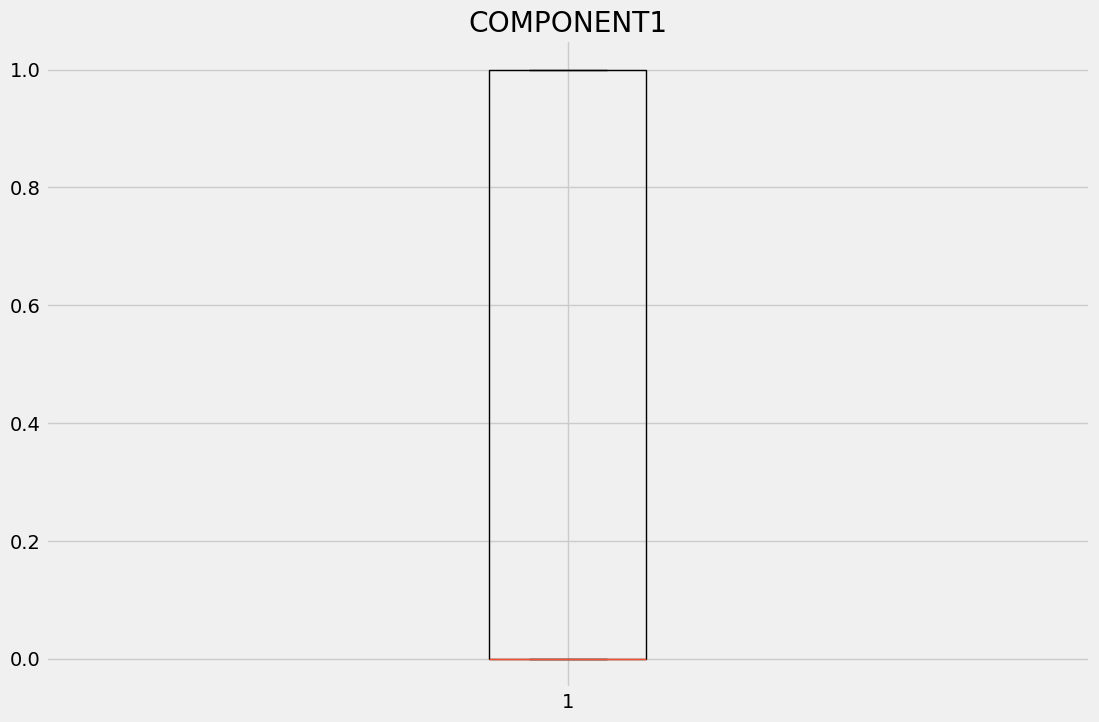

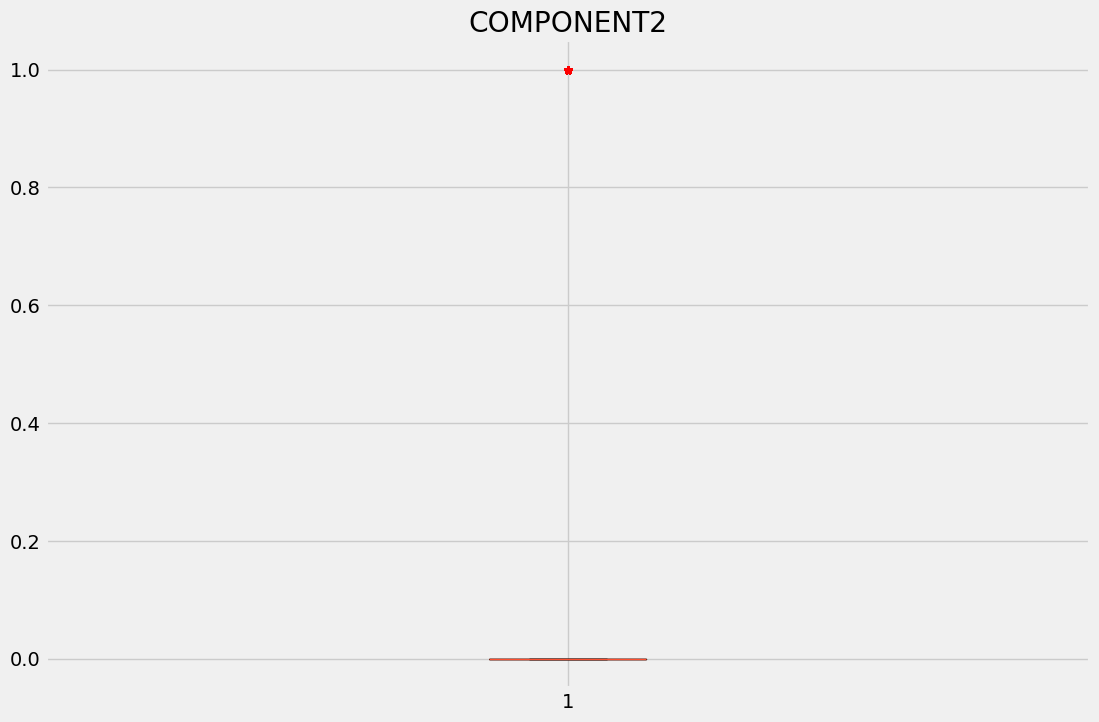

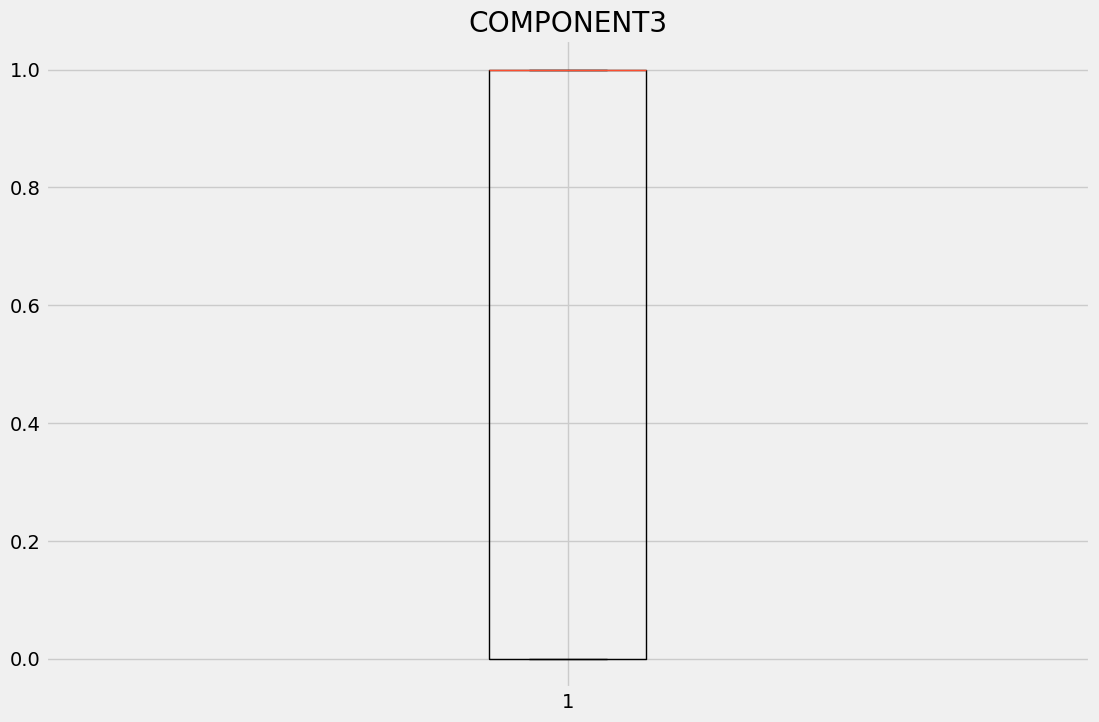

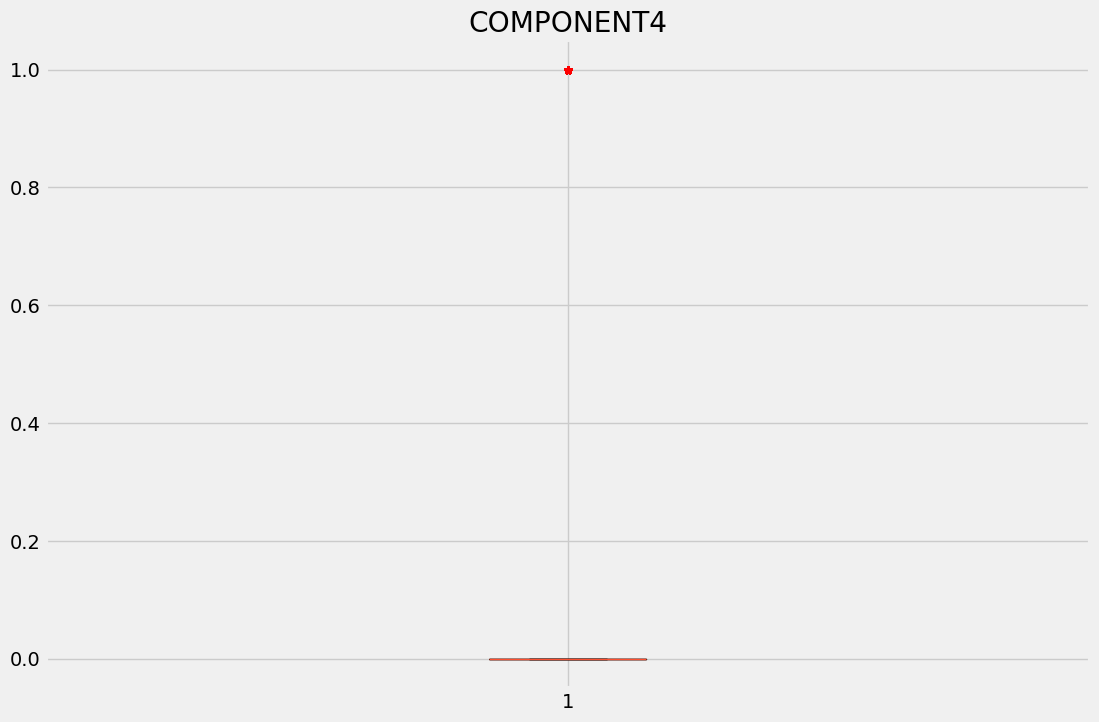

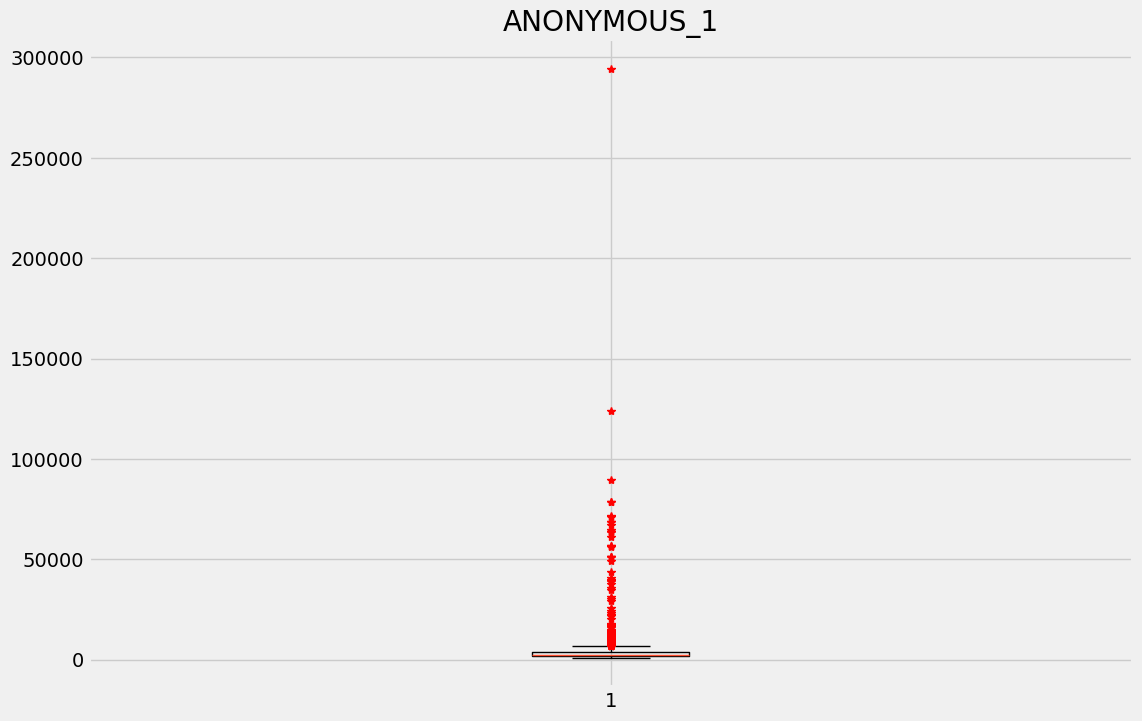

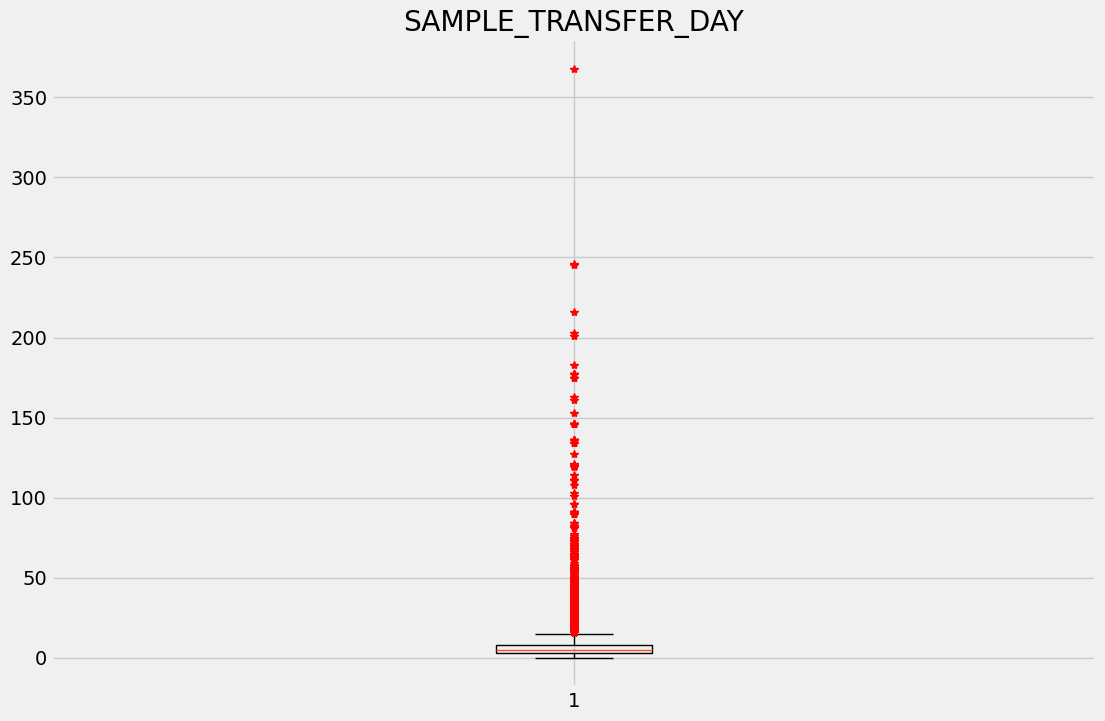

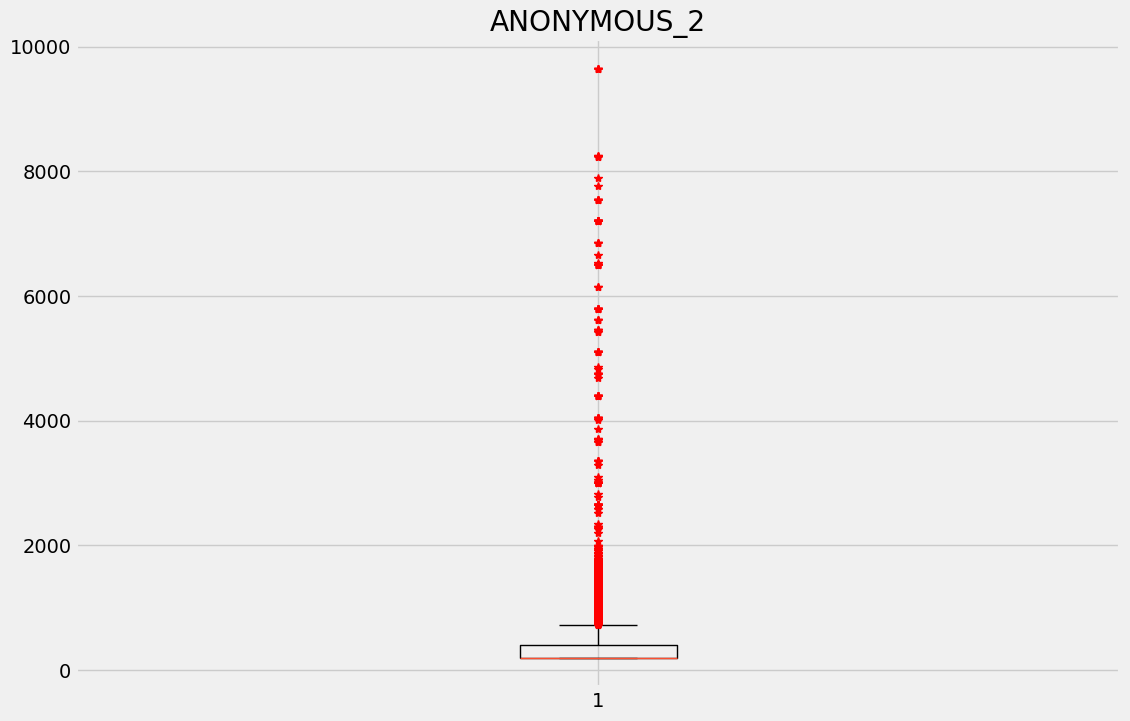

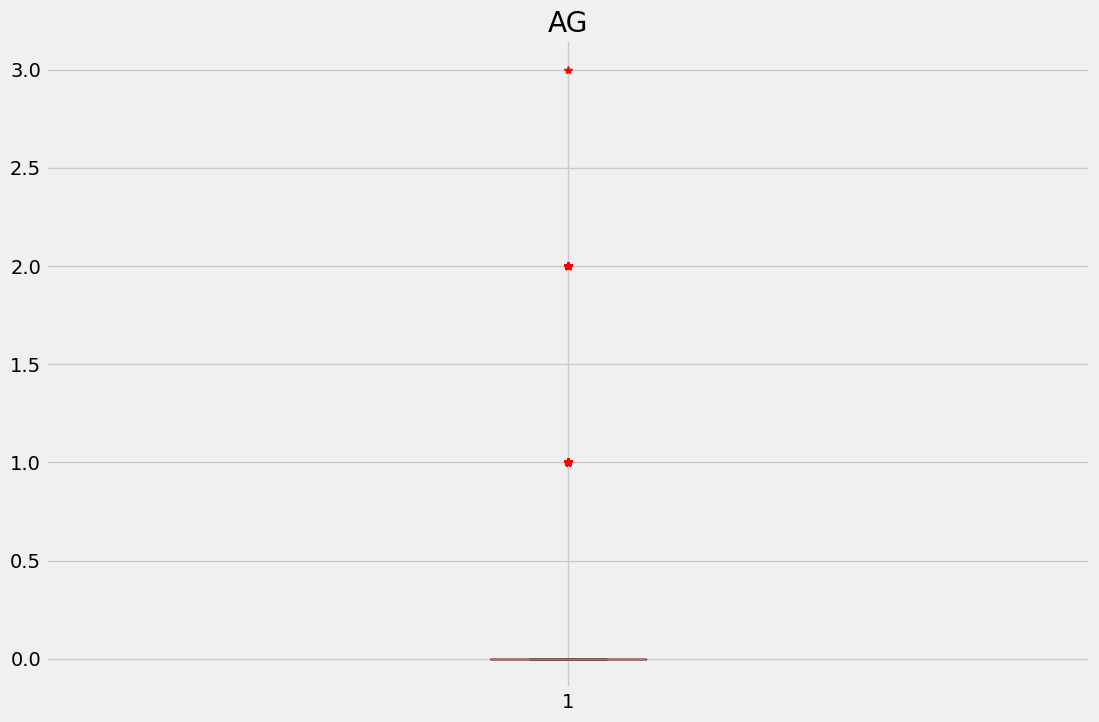

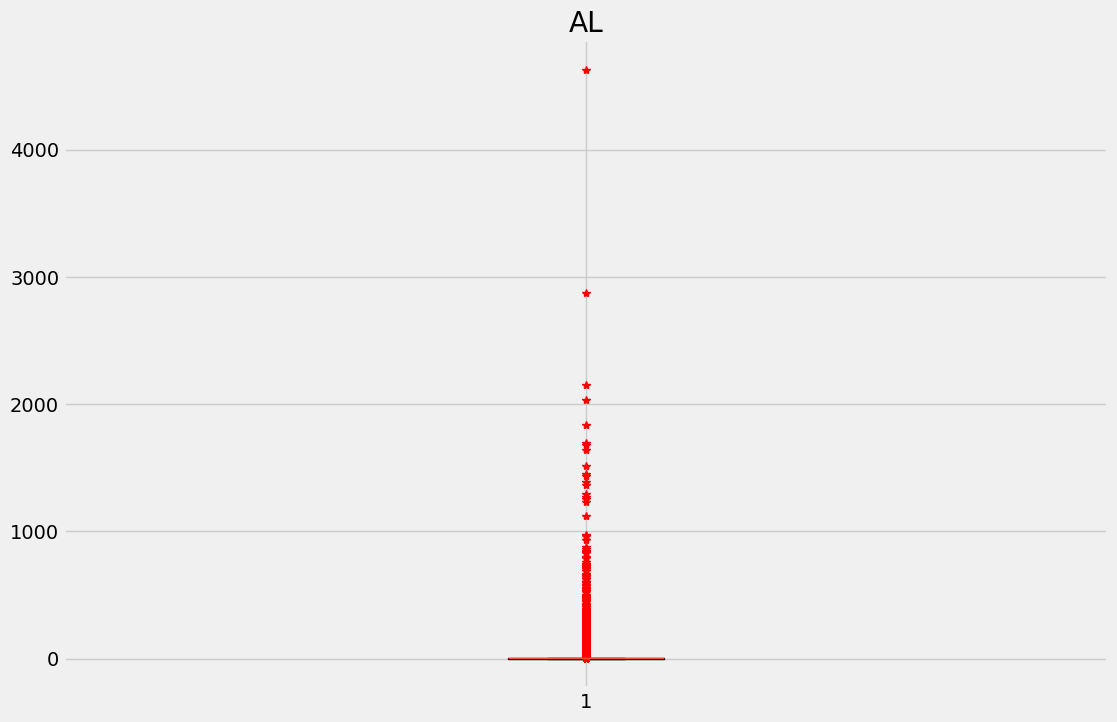

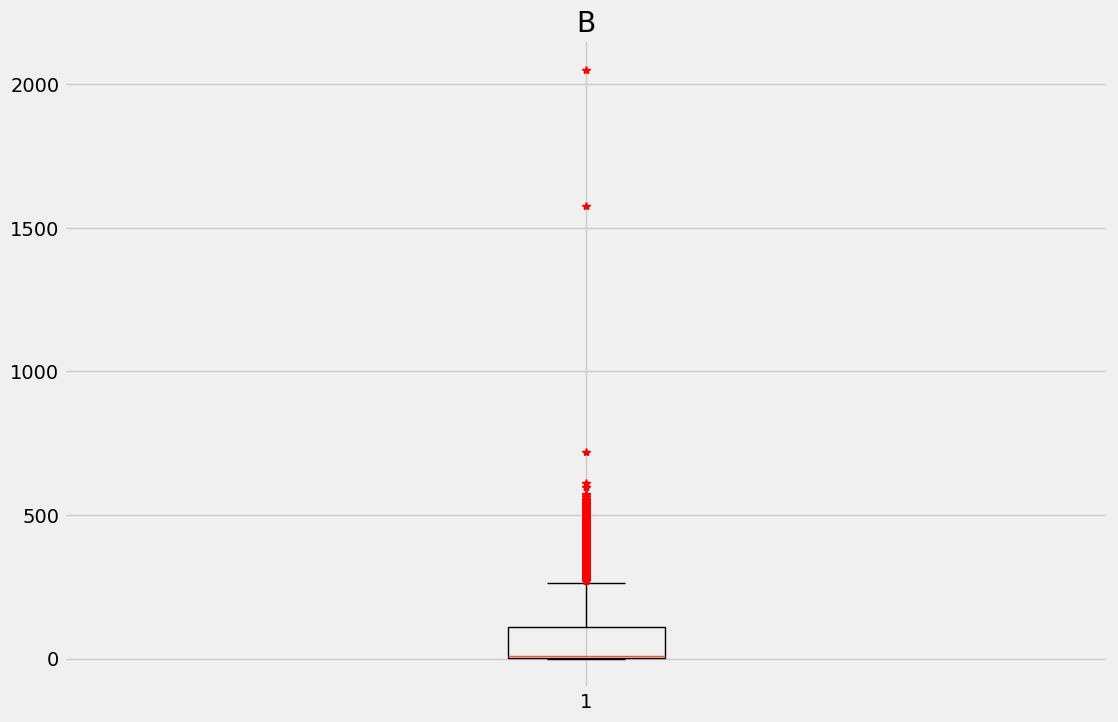

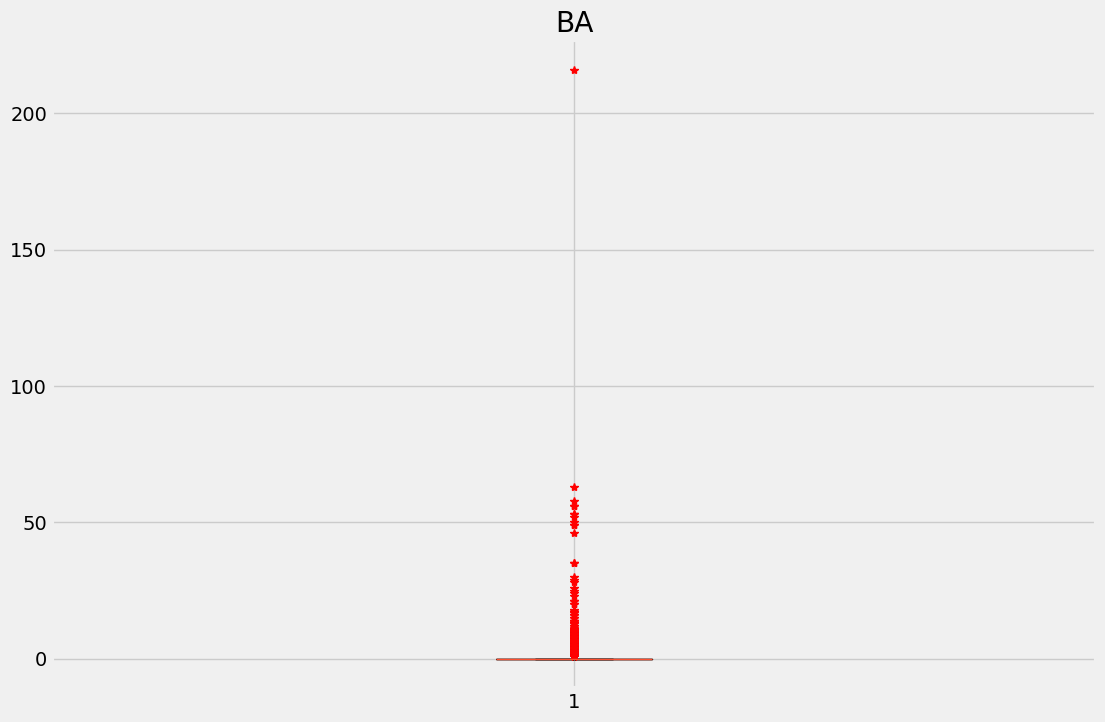

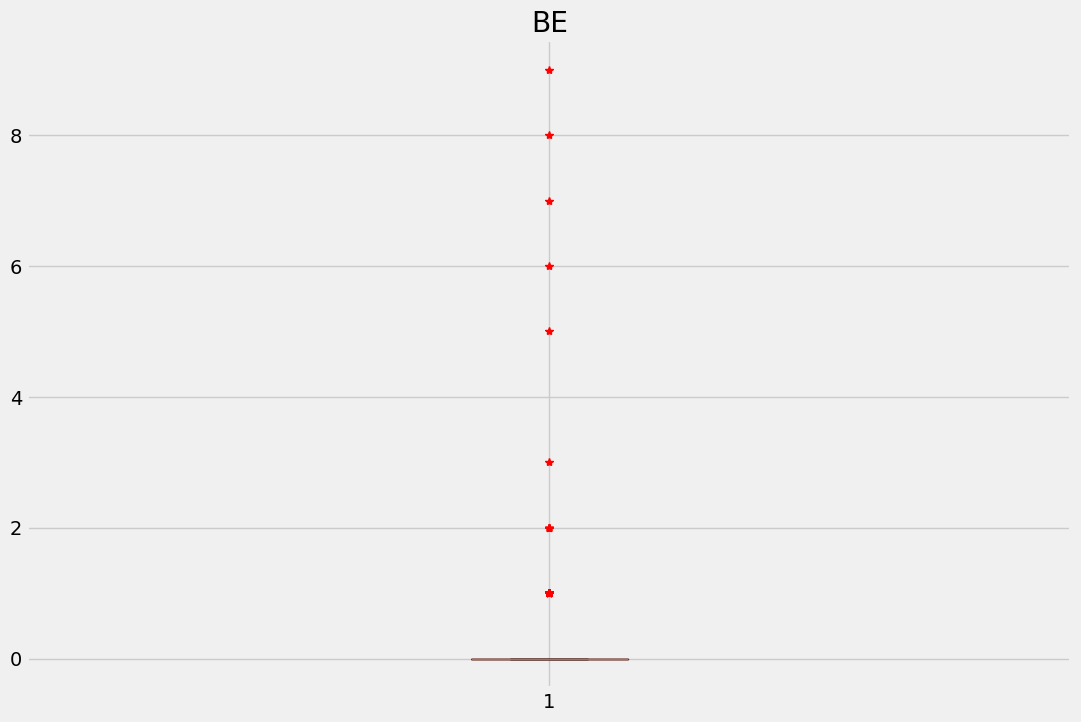

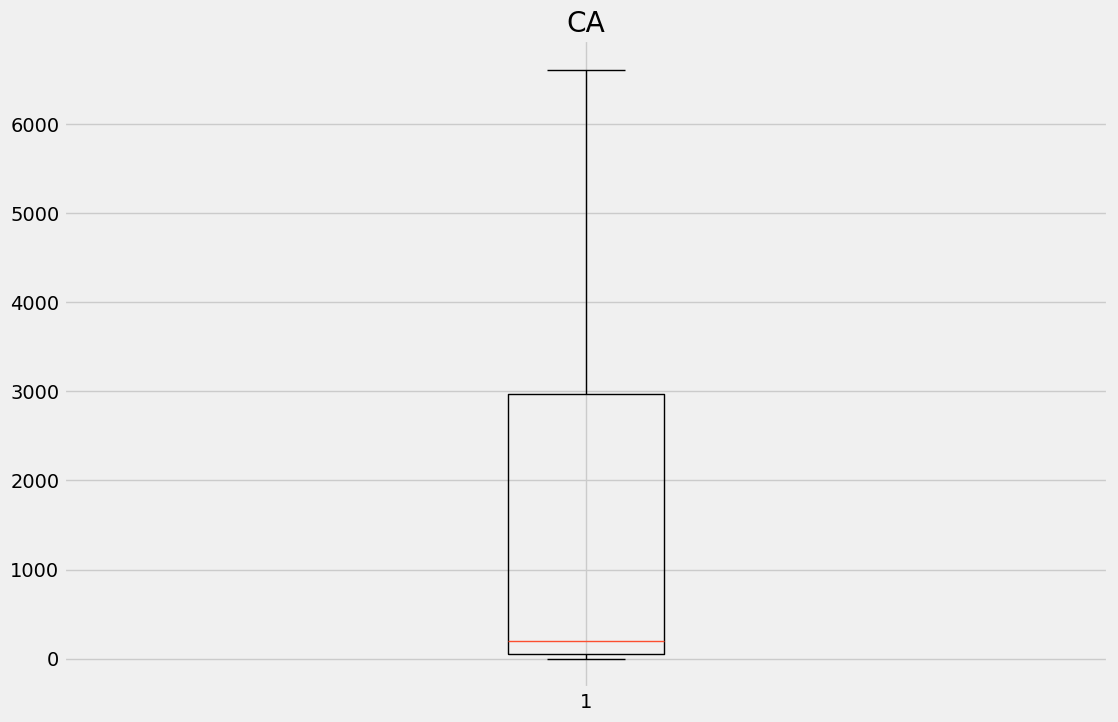

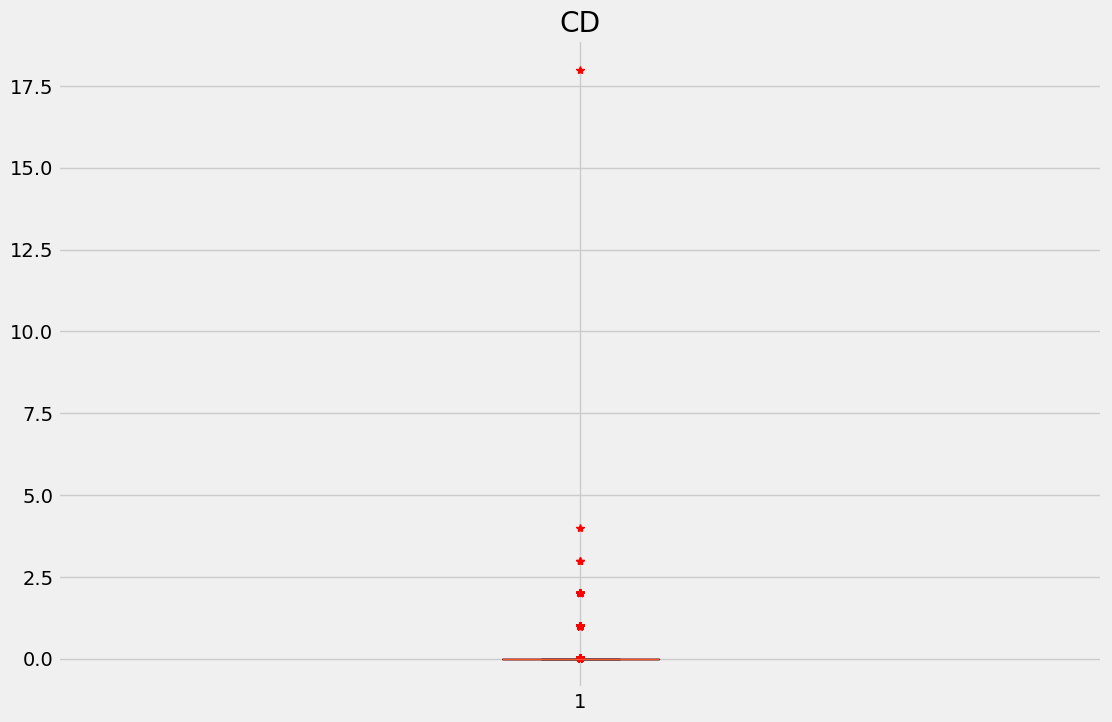

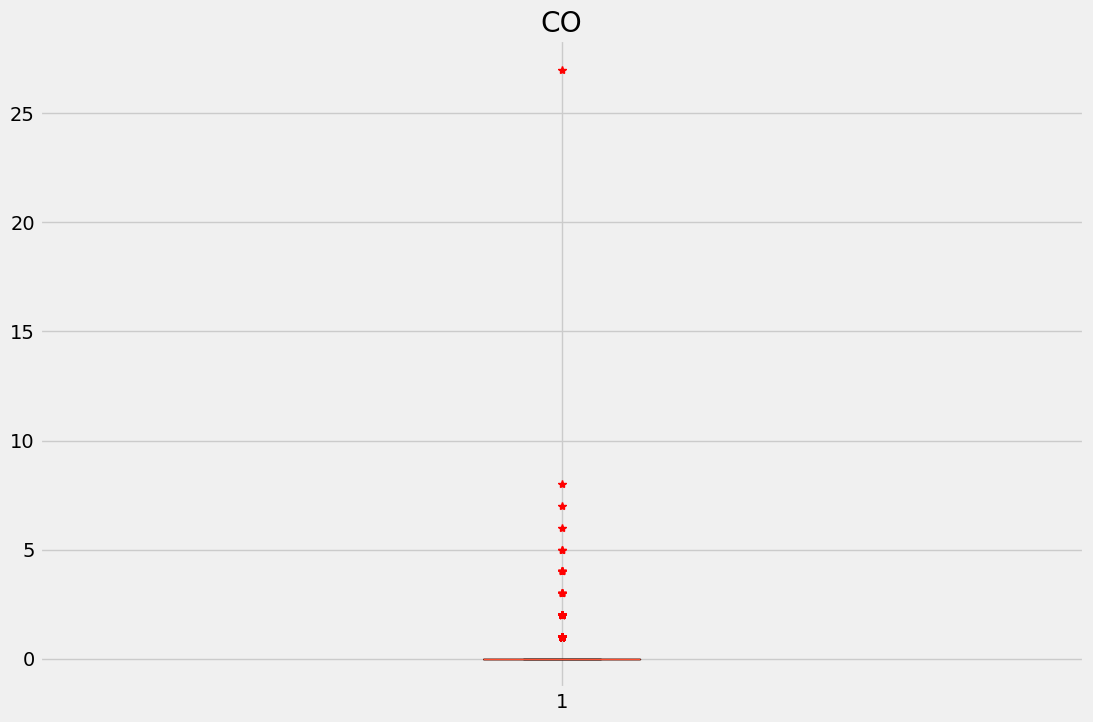

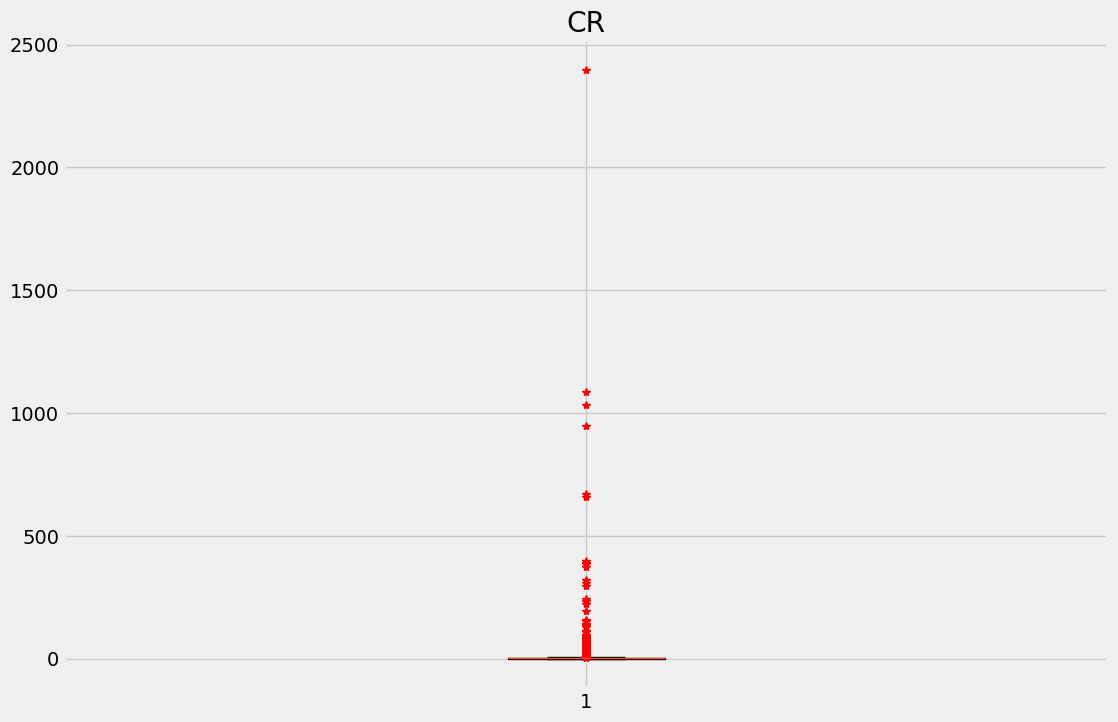

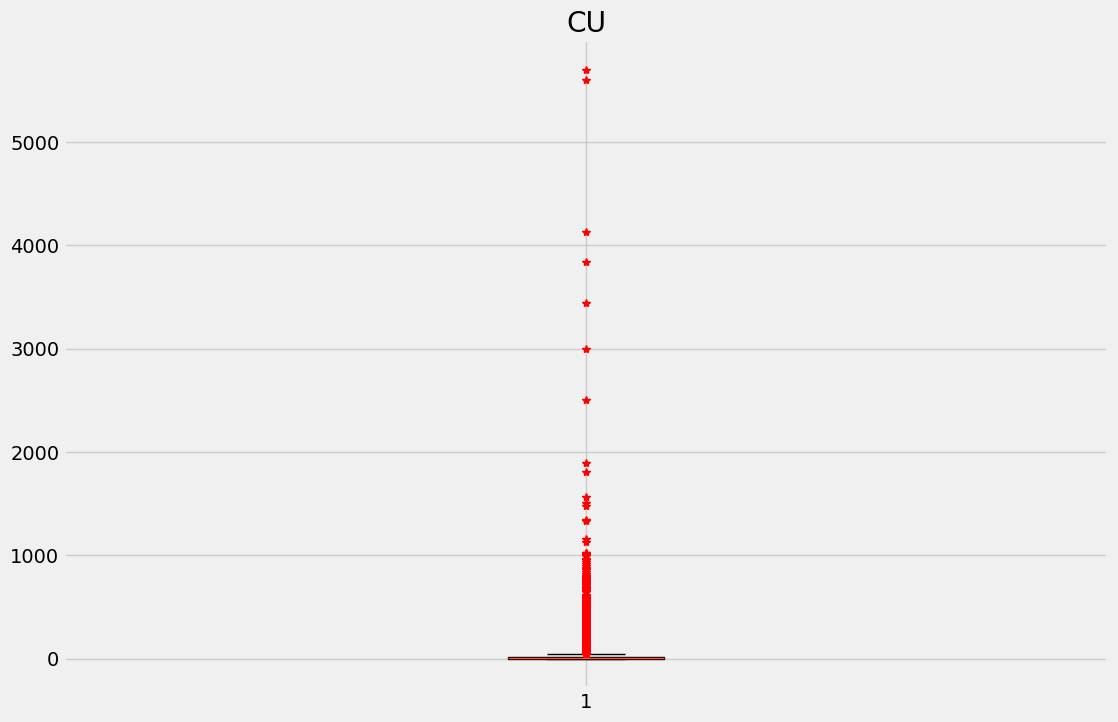

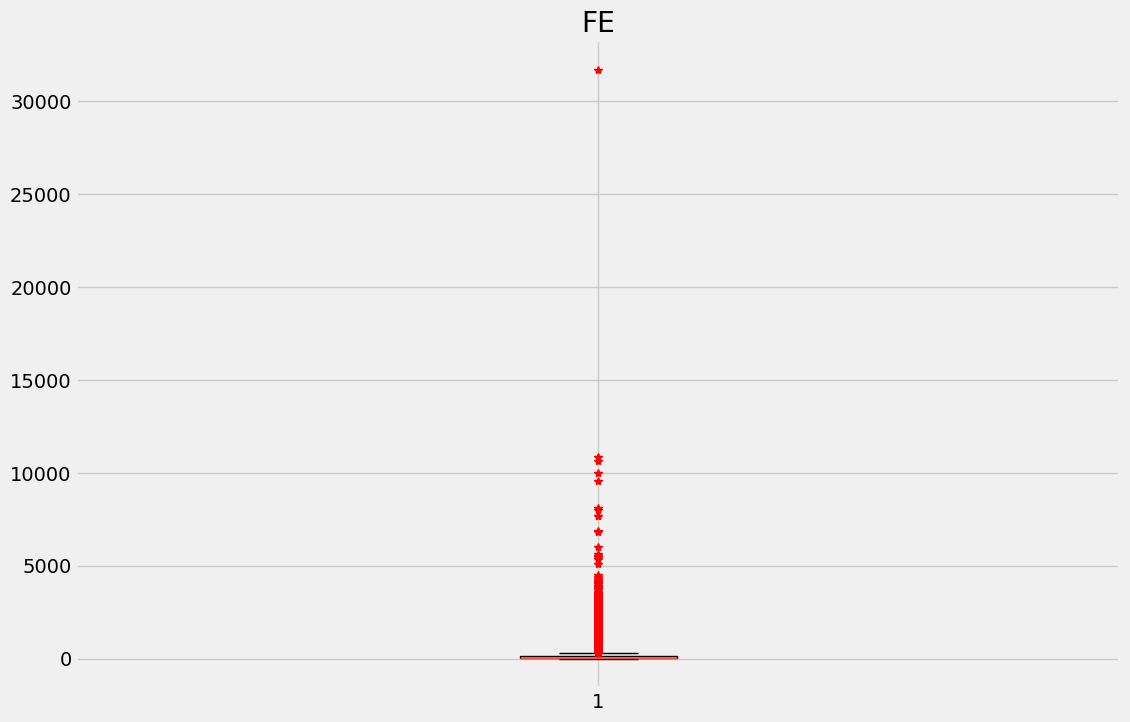

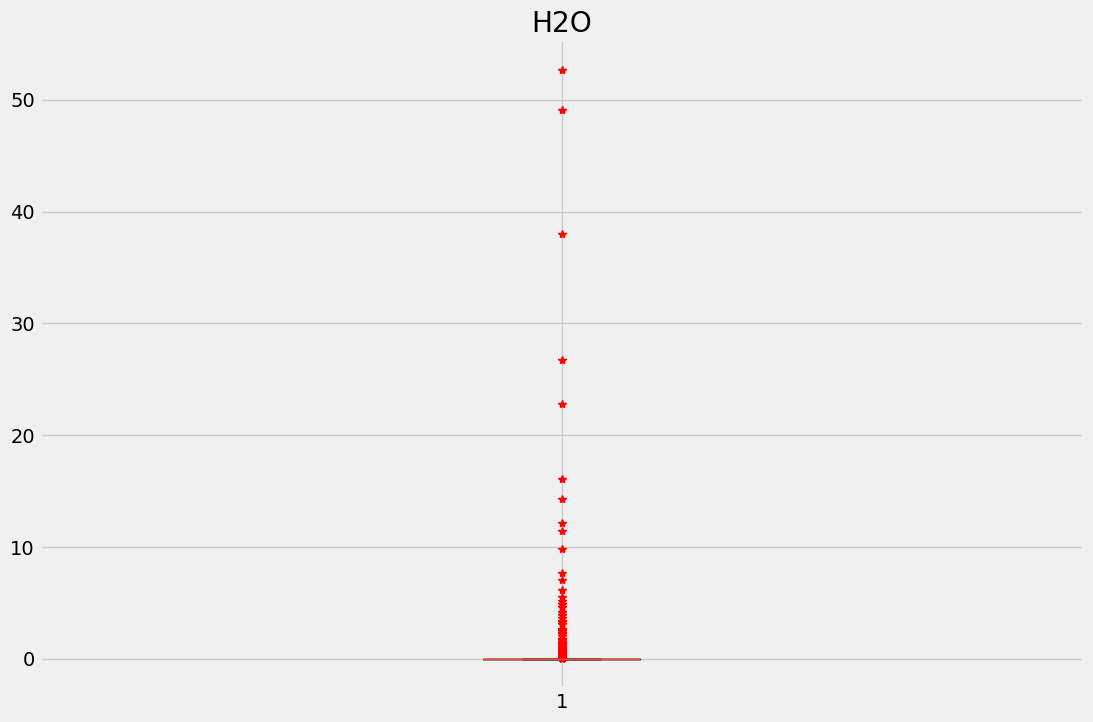

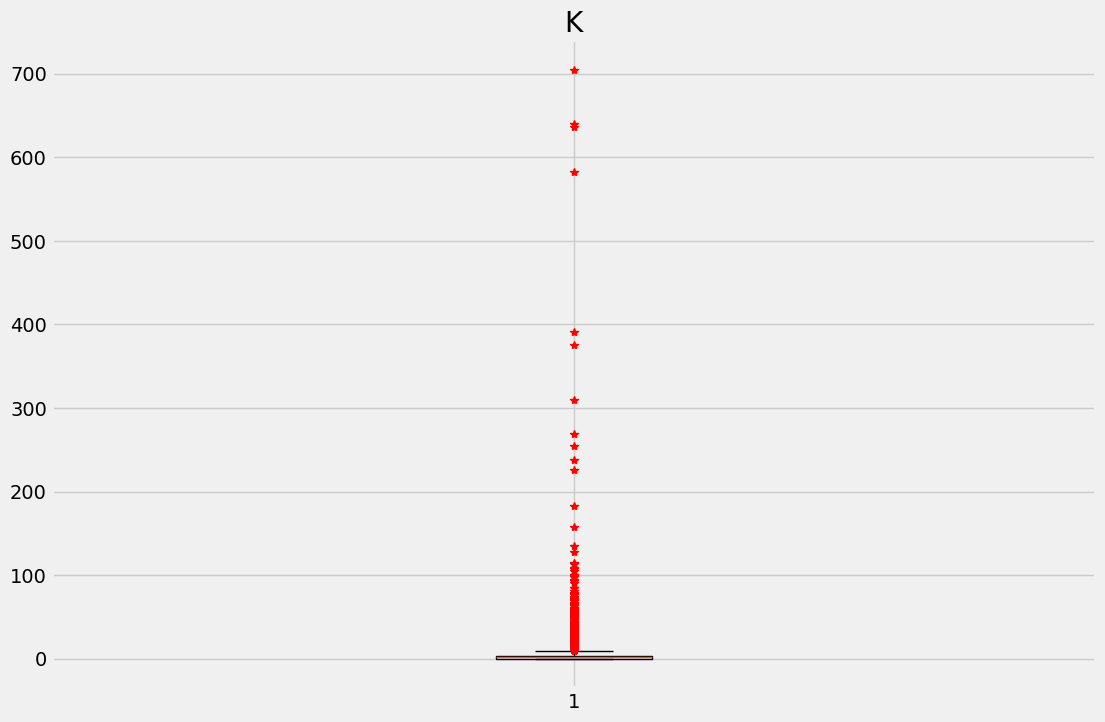

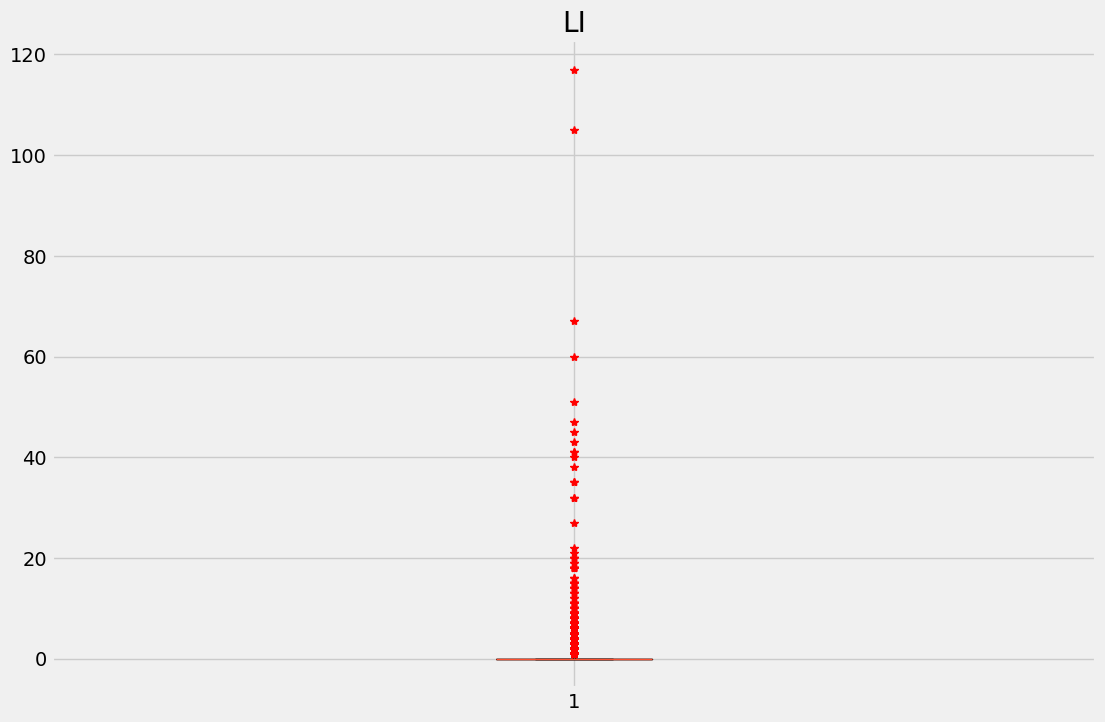

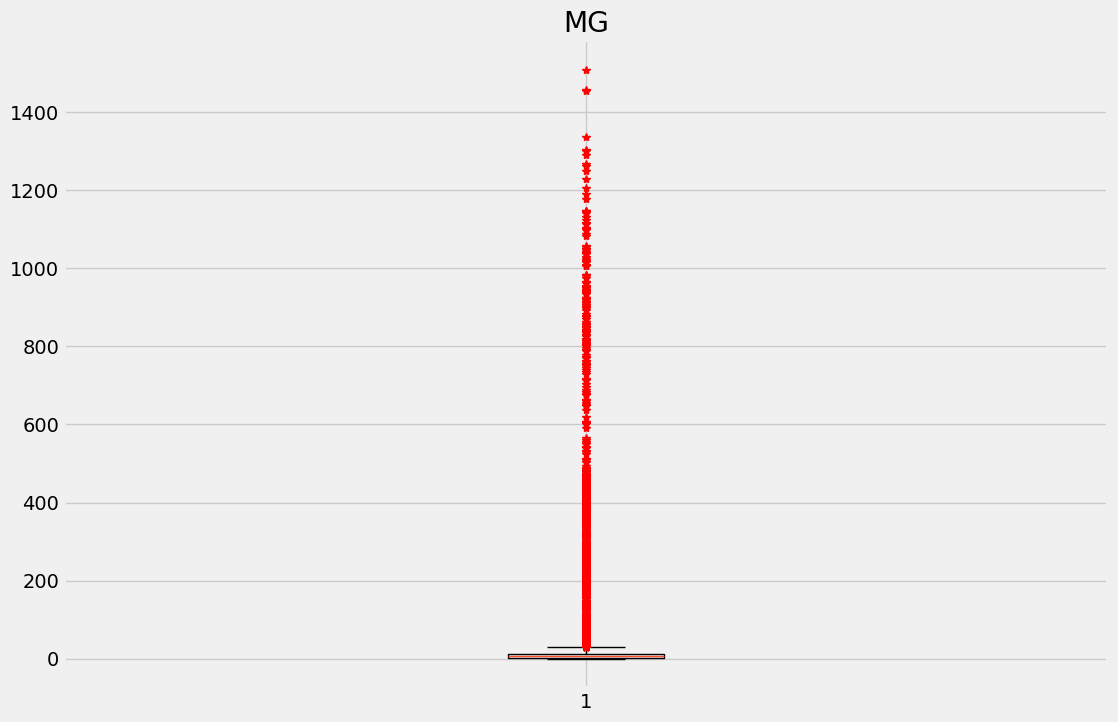

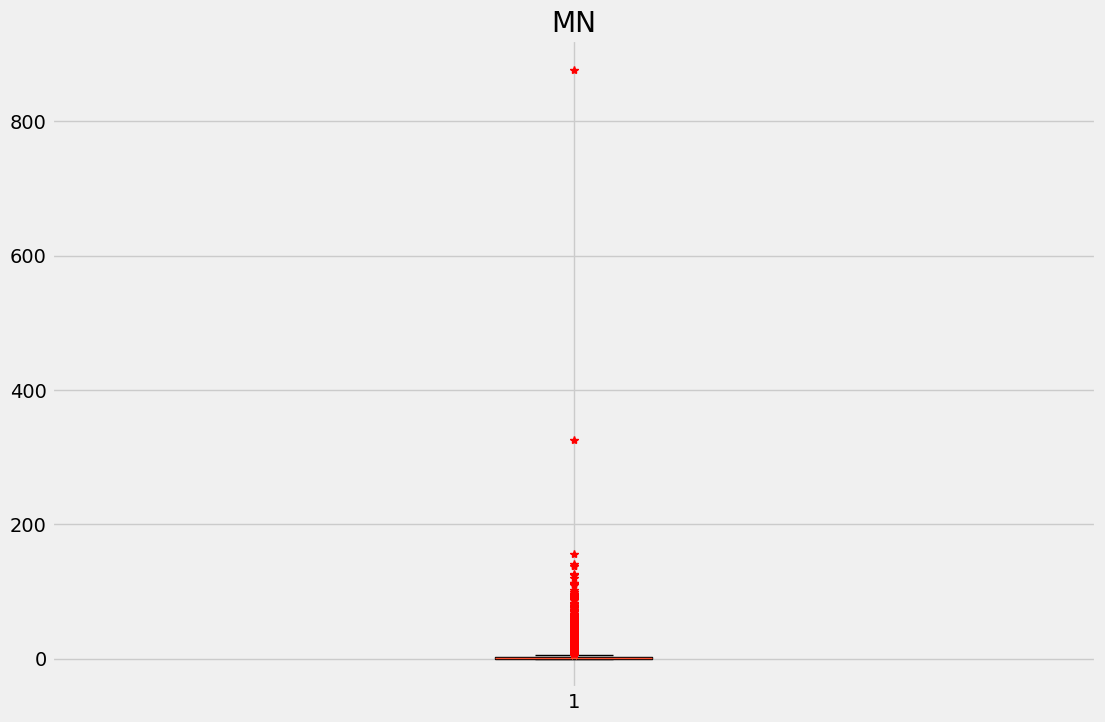

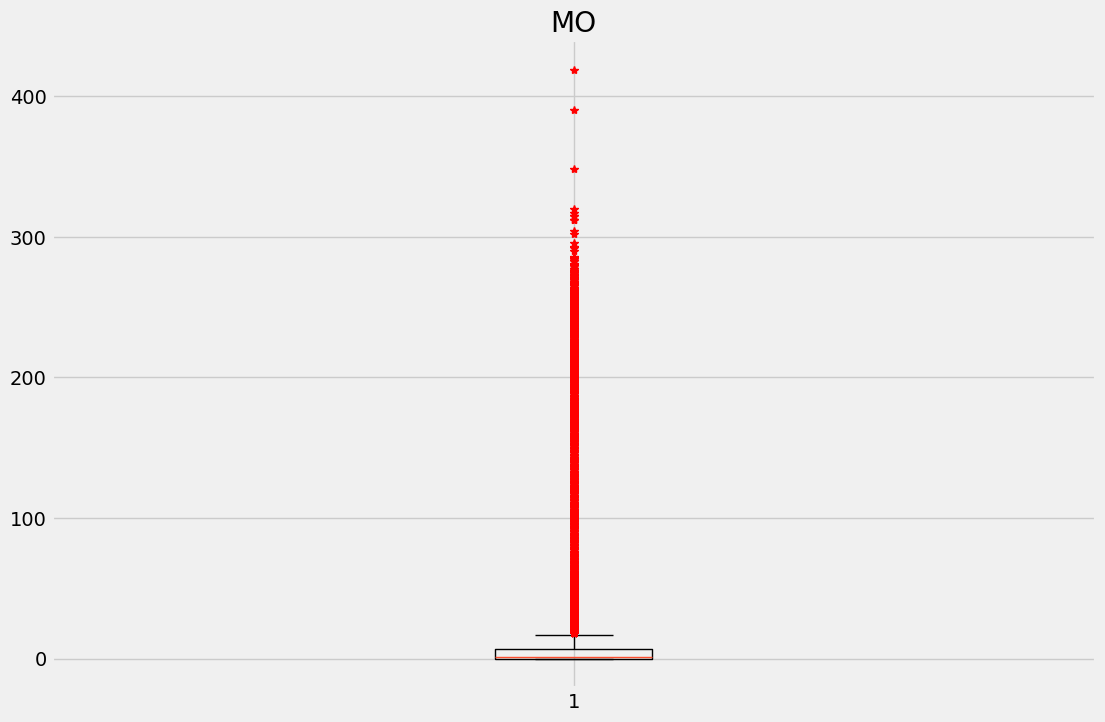

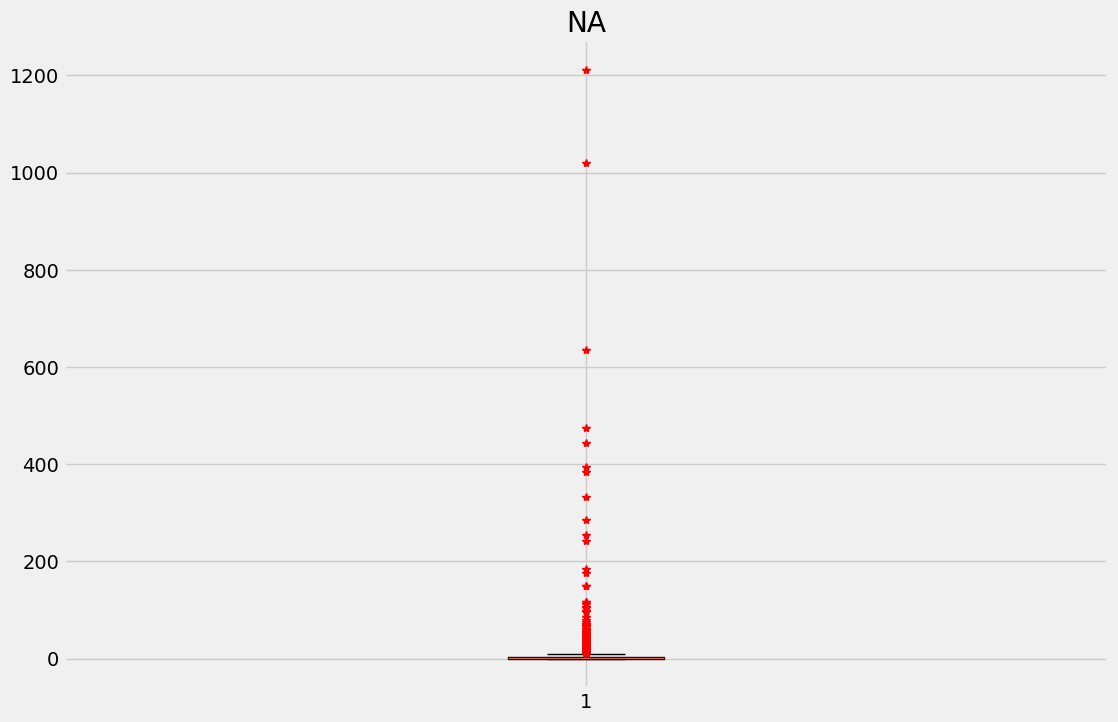

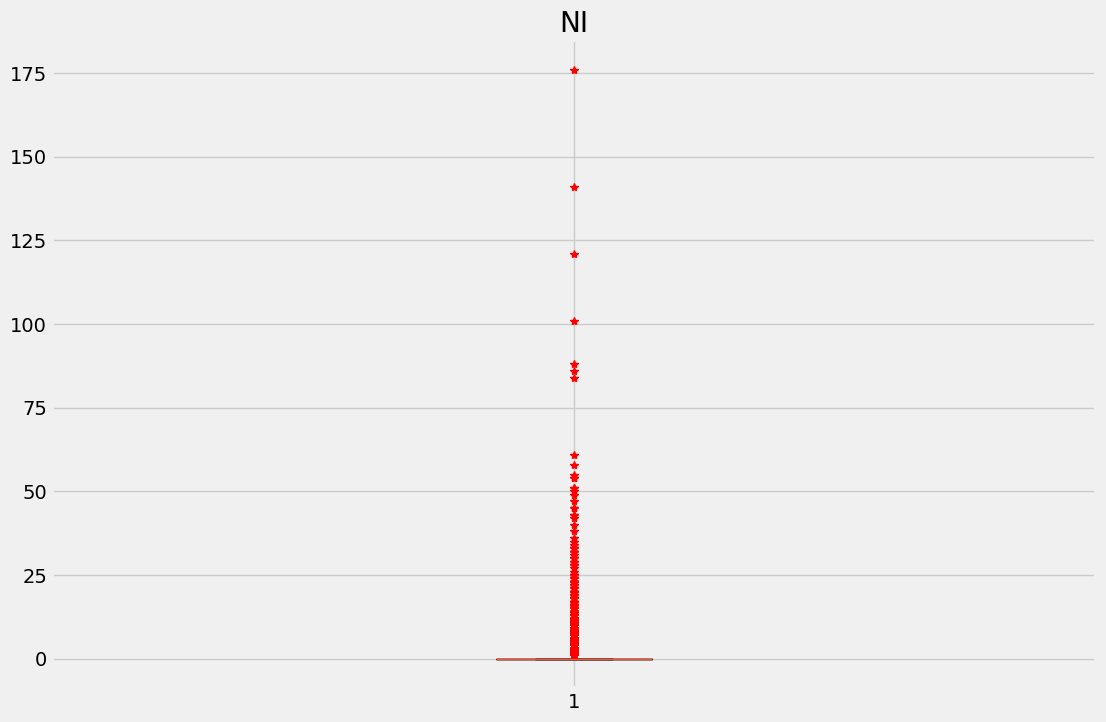

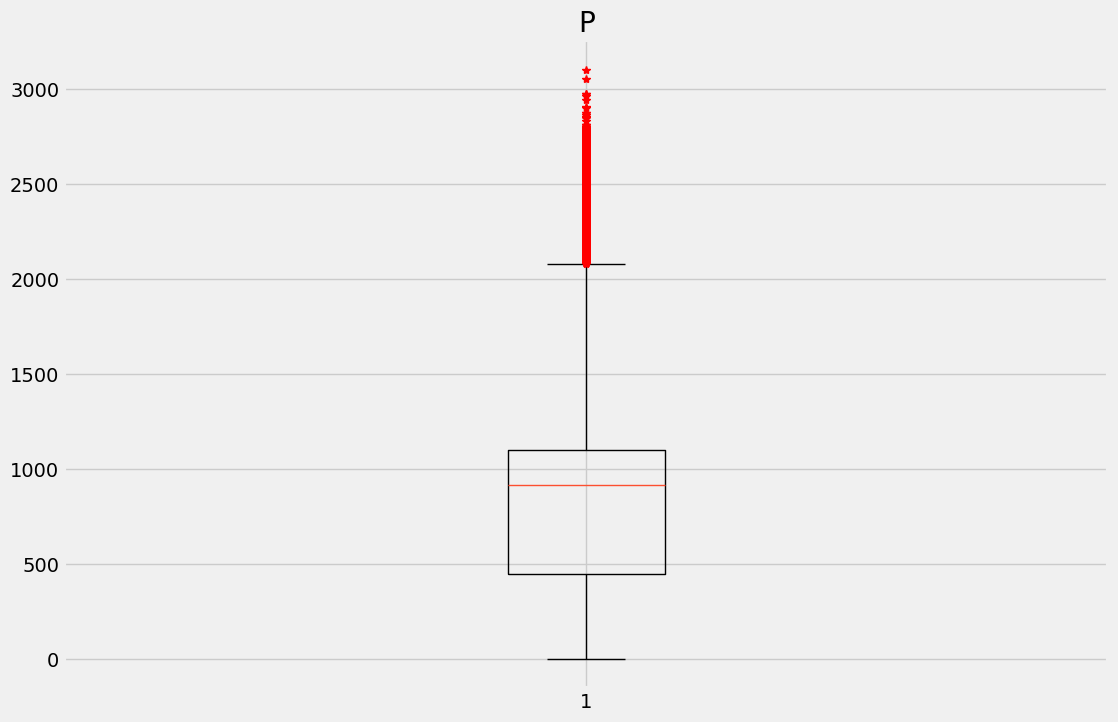

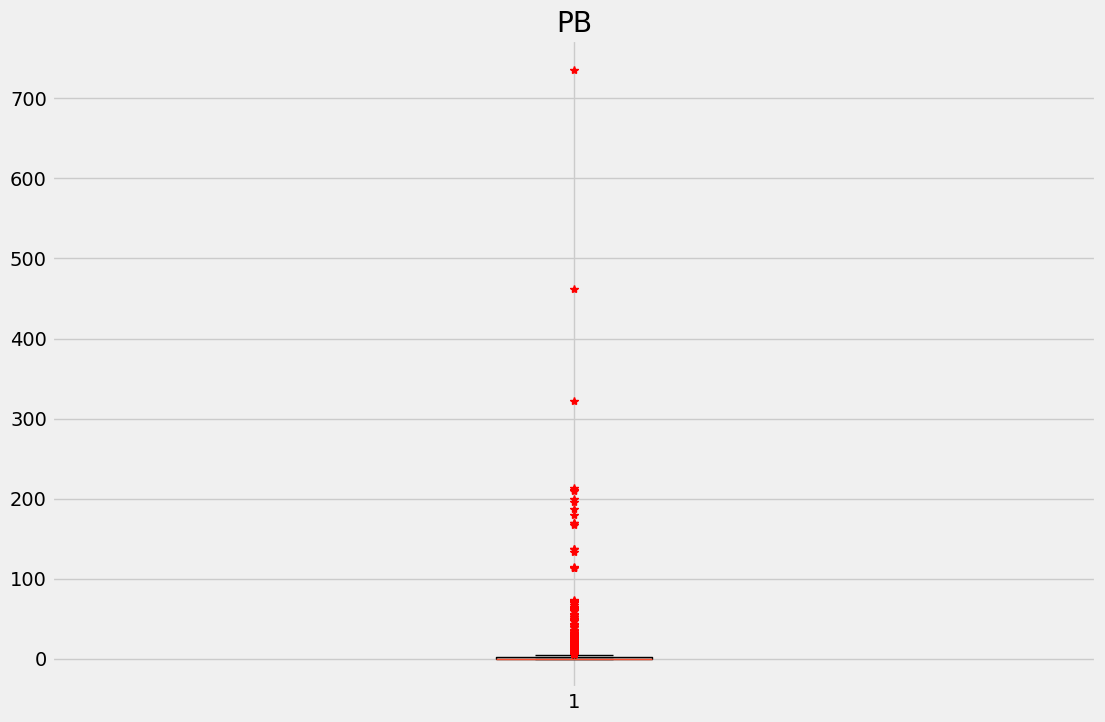

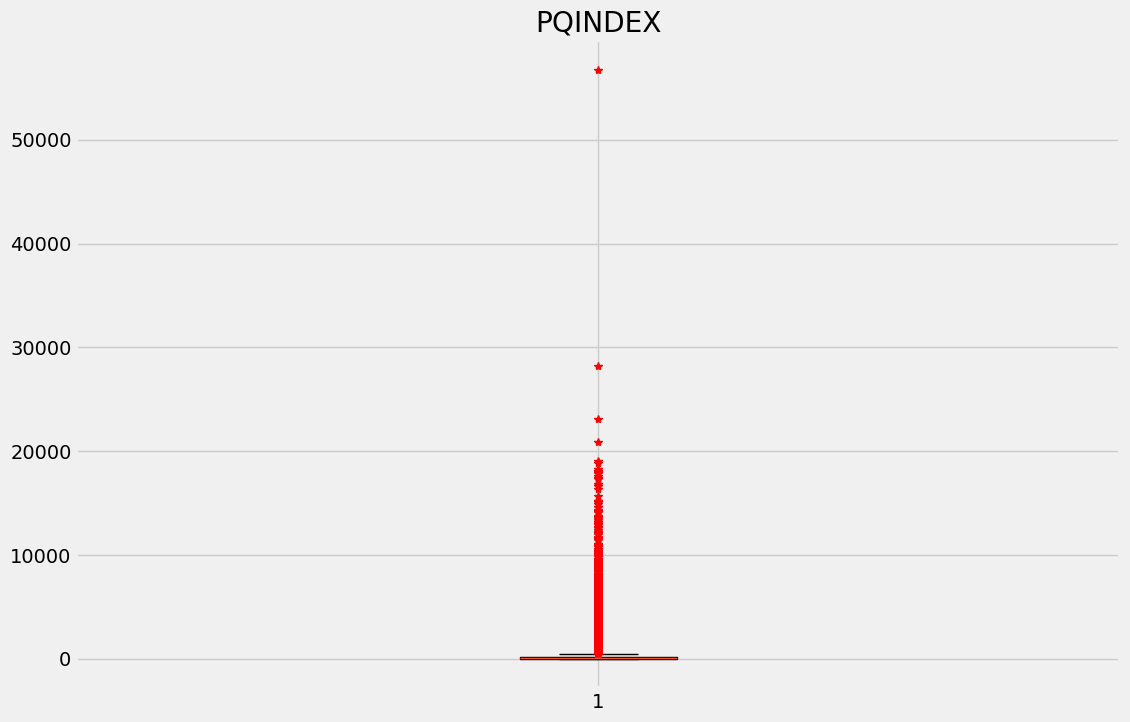

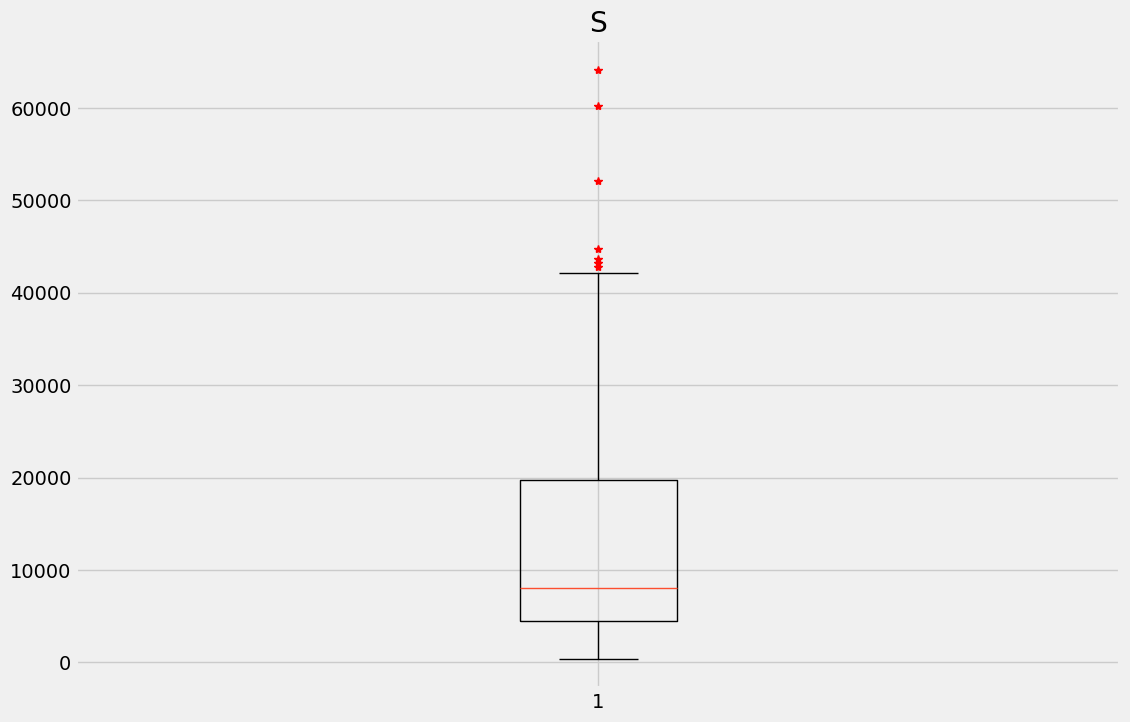

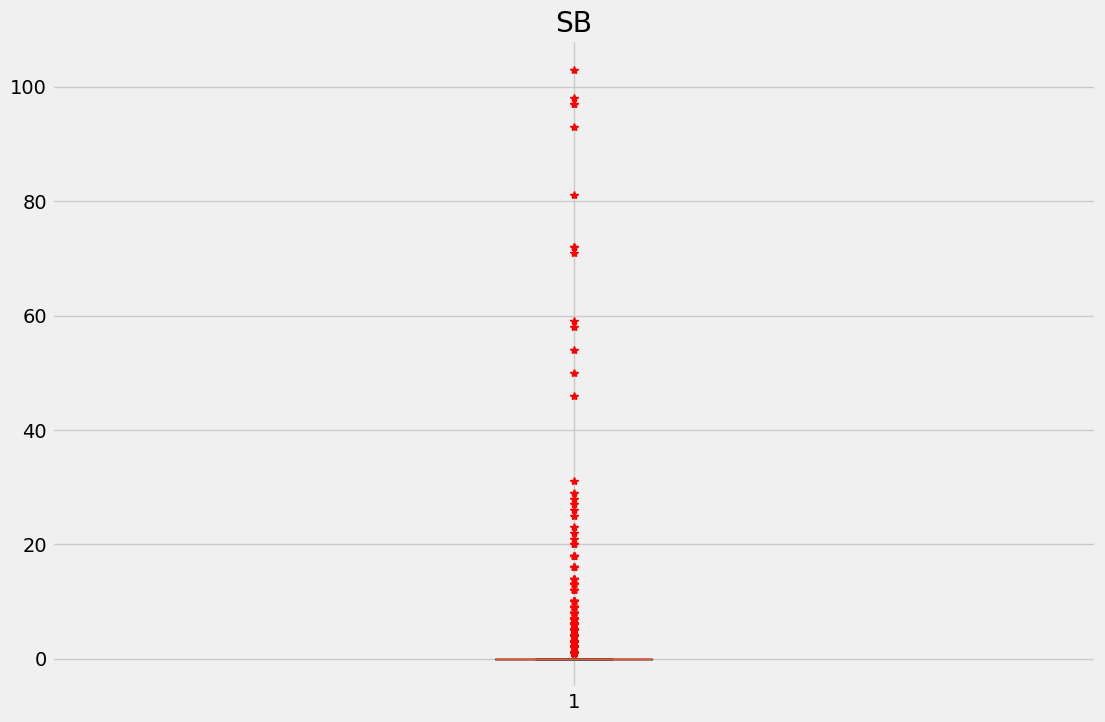

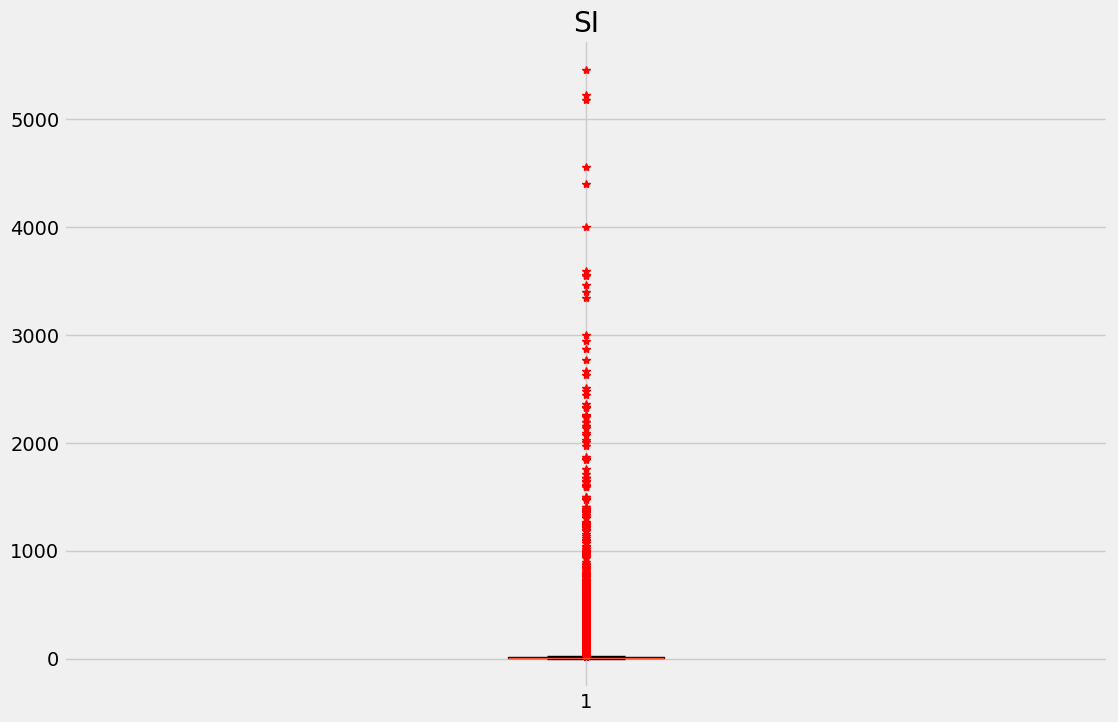

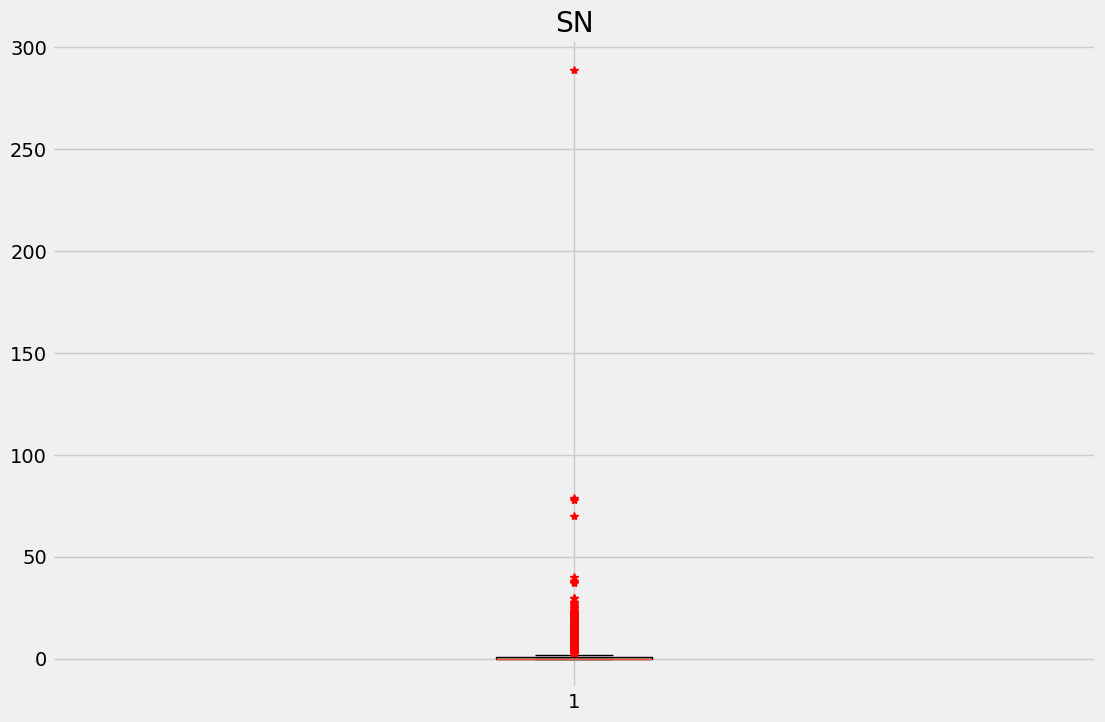

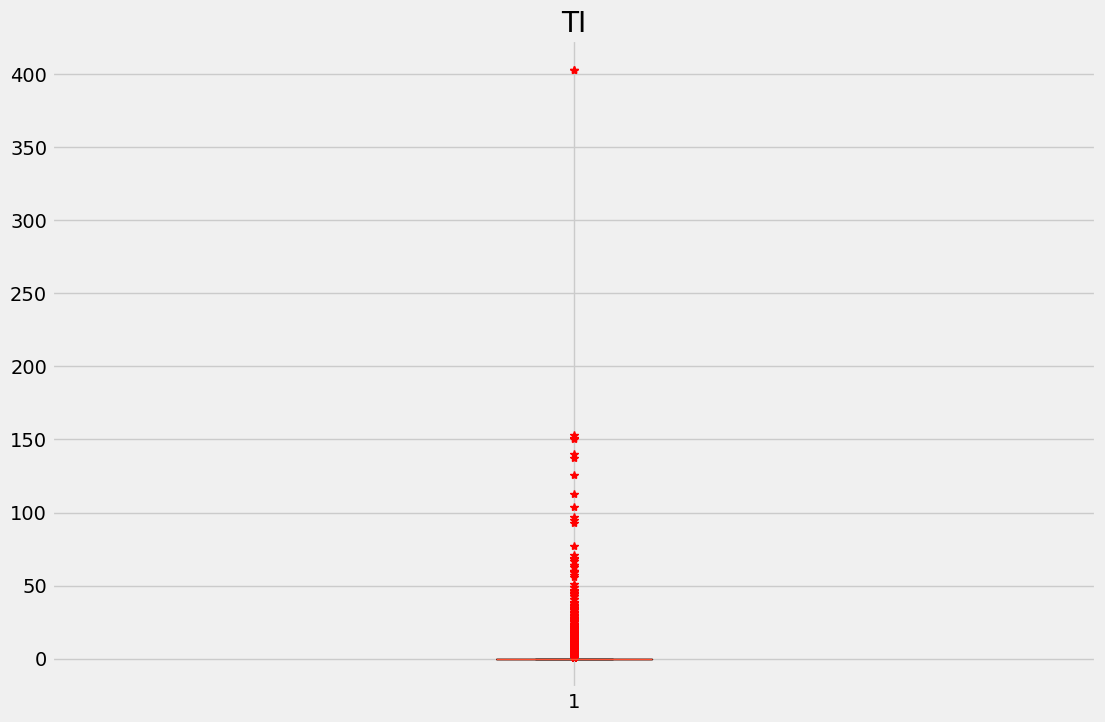

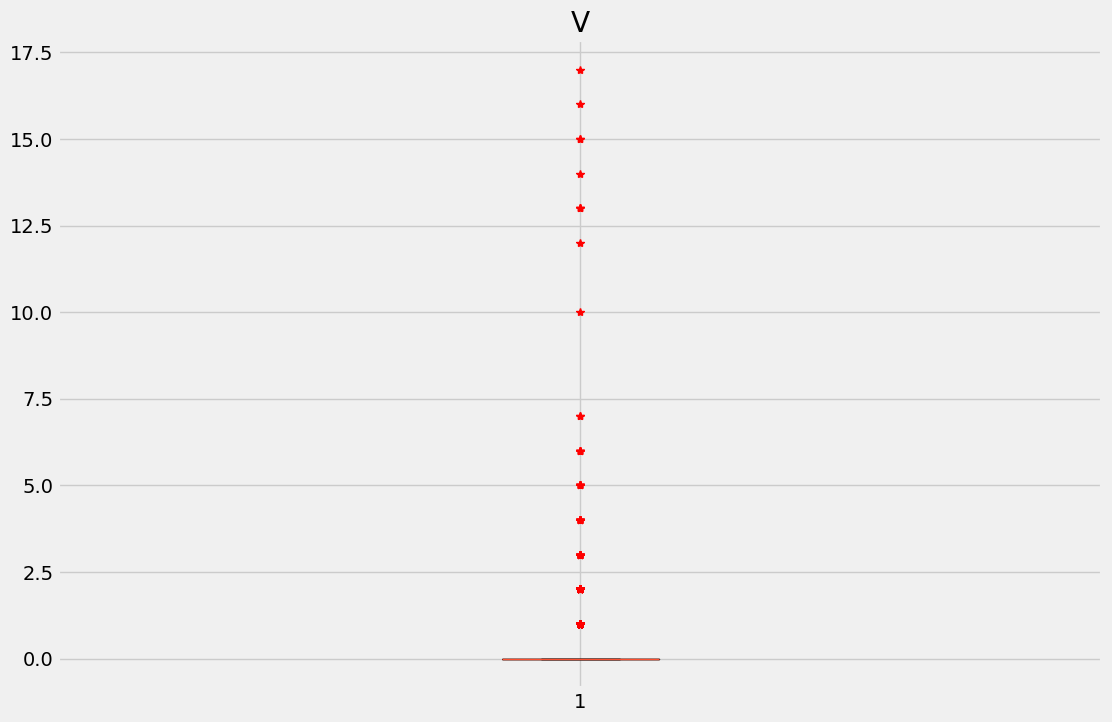

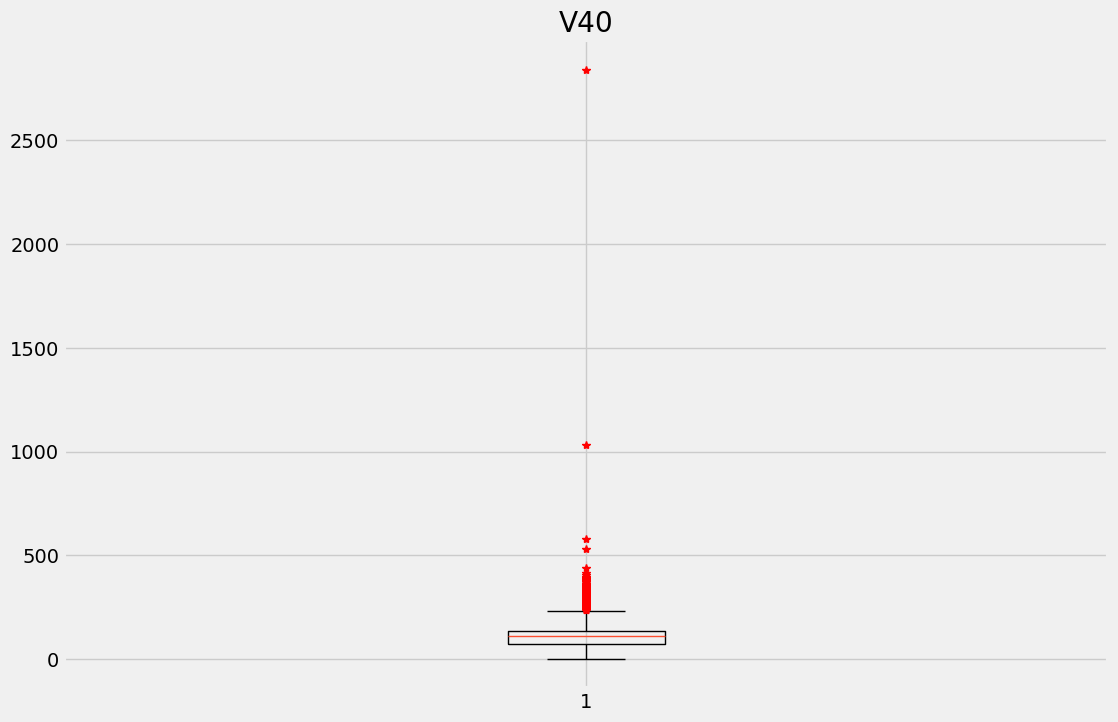

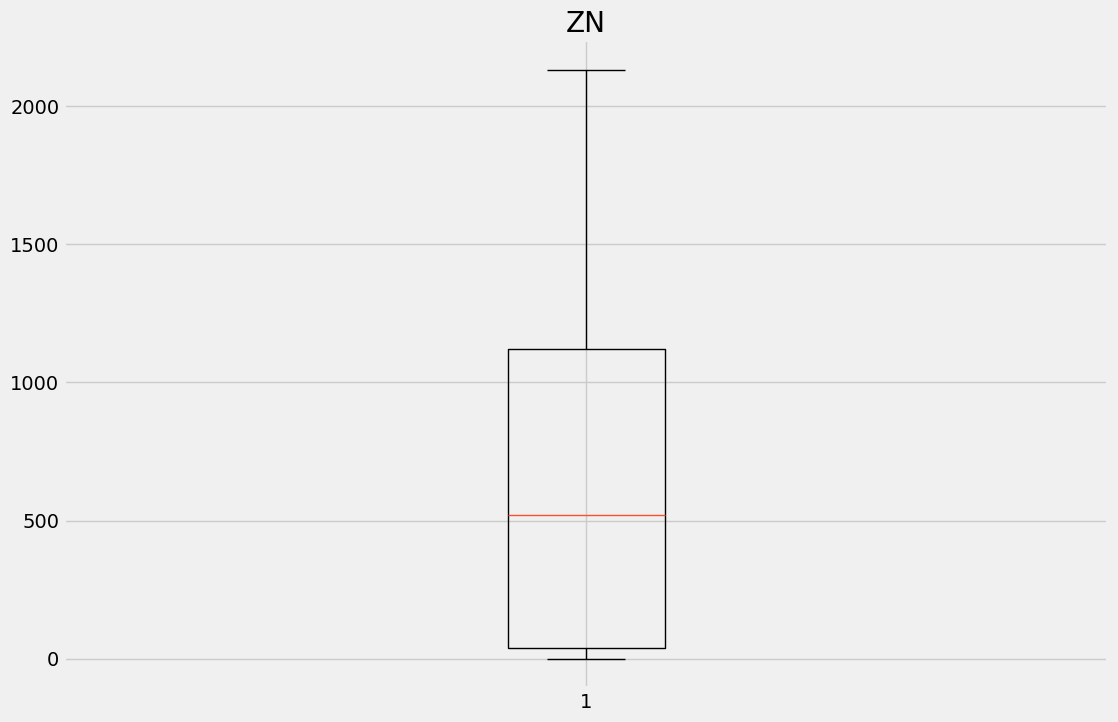

In [ ]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(df[col], sym='r*')
    plt.title(col)
    plt.show()

*    위의 boxplot을 참고하면 대부분의 데이터에서 Outlier 값이 매우 많은 것을 확인할 수 있다.
*    따라서 outlier 값을 제거하게 되면 데이터의 대부분이 소실되어 정확한 데이터 정보 파악이 불가능해 outlier 값을 포함해 데이터 시각화를 진행했다.

# 데이터 시각화

## Y_label 0과 1비율 확인

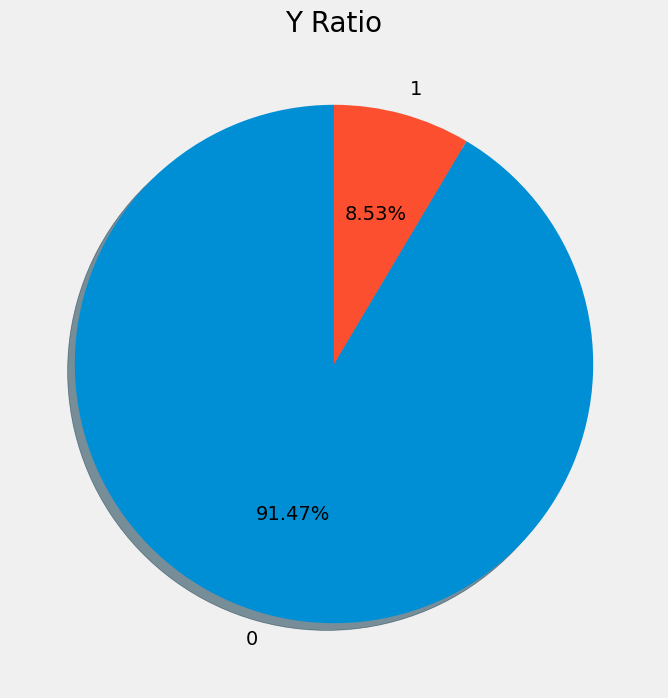

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(df['Y_LABEL'].value_counts(), labels = df['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

*   데이터의 개수가 다르기 때문에 이를 반영한 그래프 해석이 필요하다.

# ✅ **결론**

1. 정상치와 이상치의 비율이 지나치게 Imbalance하다.
2. 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
3. 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
4. train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.

# train과 test dataset나누기

### ADASYN 사용 hyperparameter 조절

In [ ]:
from imblearn.over_sampling import ADASYN

# 특성과 레이블 분리
X = df.drop('Y_LABEL', axis=1)
y = df['Y_LABEL'].astype('int')

# X는 입력 특성, y는 라벨로 이루어진 데이터셋
adasyn = ADASYN(sampling_strategy=0.5, n_neighbors=7)
X_resampled, y_resampled = adasyn.fit_resample(X, y)



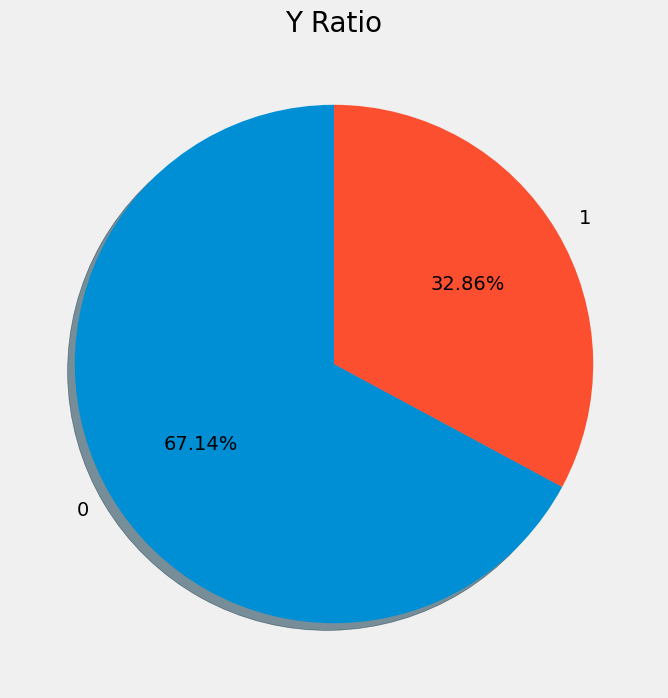

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(y_resampled.value_counts(), labels = y_resampled.value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

In [ ]:
X, y = X_resampled, y_resampled
# 데이터를 트레인 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print('X_train:\n',X_train)
print('X_test:\n',X_test)
print('y_train:\n',y_train)
print('y_test:\n',y_test)

X_train:
        COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  YEAR  \
3781            0           0           1           0         3496  2014   
30              0           0           1           0         7636  2019   
1604            0           0           1           0         9109  2017   
10027           0           0           1           0         1726  2015   
7901            1           0           0           0         1377  2008   
...           ...         ...         ...         ...          ...   ...   
11284           0           0           1           0         3575  2009   
11964           0           0           1           0         4214  2018   
5390            0           1           0           0         2202  2007   
860             0           0           1           0        22087  2013   
15795           0           0           1           0         2254  2009   

       SAMPLE_TRANSFER_DAY  ANONYMOUS_2  AG  AL  ...  PB  PQINDEX      S  SB 

## 표준화

In [ ]:
scaler = StandardScaler()

# 트레인 데이터에 대해 표준화를 적용하고, 테스트 데이터에 대해 표준화를 적용
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 결과 확인
print(X_train_std)
print(X_test_std)
print(y_train)
print(y_test)

[[-0.5846166  -0.42668023  1.01932482 ... -0.10477804  0.36570647
  -1.07471599]
 [-0.5846166  -0.42668023  1.01932482 ... -0.10477804  1.03513308
  -0.71527228]
 [-0.5846166  -0.42668023  1.01932482 ... -0.10477804  0.60258051
  -1.06147333]
 ...
 [-0.5846166   2.34367551 -0.98104155 ... -0.10477804 -1.37068316
   0.16631073]
 [-0.5846166  -0.42668023  1.01932482 ... -0.10477804  0.58198276
  -0.9914764 ]
 [-0.5846166  -0.42668023  1.01932482 ... -0.10477804  1.06708426
  -1.00850268]]
[[-0.5846166   2.34367551 -0.98104155 ... -0.10477804 -1.14822755
  -0.13070329]
 [-0.5846166   2.34367551 -0.98104155 ... -0.10477804 -1.42423729
  -0.21394289]
 [-0.5846166   2.34367551 -0.98104155 ... -0.10477804 -1.36001875
   0.08117932]
 ...
 [ 1.71052275 -0.42668023 -0.98104155 ... -0.10477804  0.08351741
   1.05735278]
 [ 1.71052275 -0.42668023 -0.98104155 ... -0.10477804 -0.5220562
   1.33166509]
 [ 1.71052275 -0.42668023 -0.98104155 ... -0.10477804  0.20135142
   1.62678729]]
3781     0
30    

# 모델 적합

## KNN
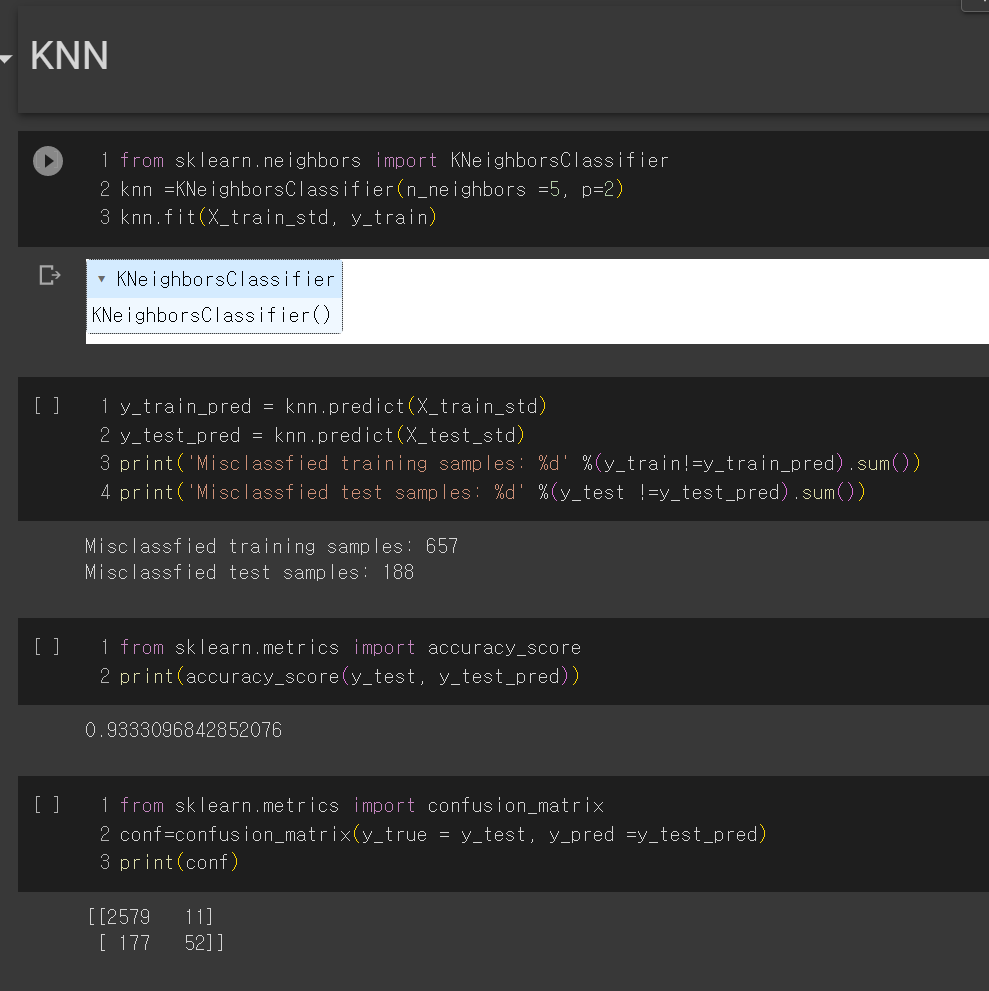

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN 분류기 생성
knn = KNeighborsClassifier()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_neighbors': [3, 5, 7],  # 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 함수
    'metric': ['euclidean', 'manhattan']  # 거리 측정 방법
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_test_pred = grid_search.predict(X_test_std)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_train_pred = grid_search.predict(X_train_std)
y_test_pred = grid_search.predict(X_test_std)
print('Misclassfied training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassfied test samples: %d' %(y_test !=y_test_pred).sum())

Misclassfied training samples: 0
Misclassfied test samples: 264


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9312678989846395


In [ ]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true = y_test, y_pred =y_test_pred)
print(conf)

[[2430  202]
 [  62 1147]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10260
           1       1.00      1.00      1.00      5102

    accuracy                           1.00     15362
   macro avg       1.00      1.00      1.00     15362
weighted avg       1.00      1.00      1.00     15362

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2632
           1       0.85      0.95      0.90      1209

    accuracy                           0.93      3841
   macro avg       0.91      0.94      0.92      3841
weighted avg       0.94      0.93      0.93      3841



## Logistic regression classifier
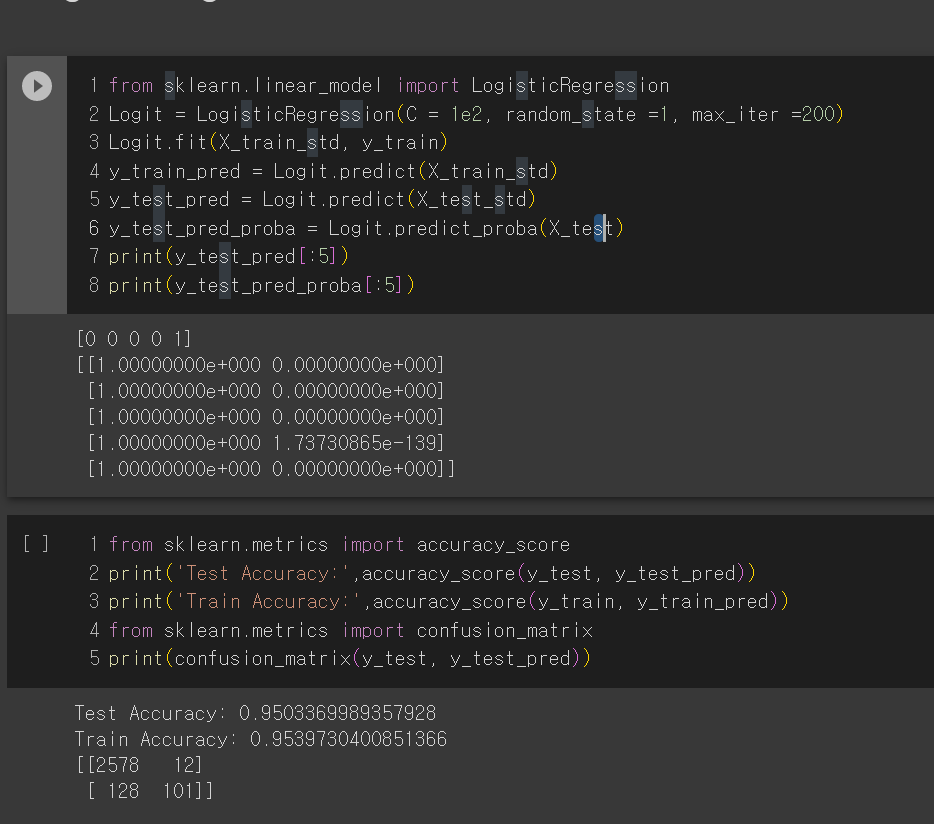

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 분류기 생성
logistic_reg = LogisticRegression()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1.0, 10.0],  # 규제 매개변수
    'penalty': ['l1', 'l2'],  # 규제 유형
    'solver': ['liblinear']  # 최적화 알고리즘
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_pred = grid_search.predict(X_test_std)


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_test_pred = grid_search.predict(X_test_std)
y_train_pred = grid_search.predict(X_train_std)

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9036709190315022
Train Accuracy: 0.8948053638849108
[[2589   43]
 [ 327  882]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     10260
           1       0.95      0.72      0.82      5102

    accuracy                           0.89     15362
   macro avg       0.91      0.85      0.87     15362
weighted avg       0.90      0.89      0.89     15362

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2632
           1       0.95      0.73      0.83      1209

    accuracy                           0.90      3841
   macro avg       0.92      0.86      0.88      3841
weighted avg       0.91      0.90      0.90      3841



### L1, L2 Regularization : 위에서 해서 안해도댐
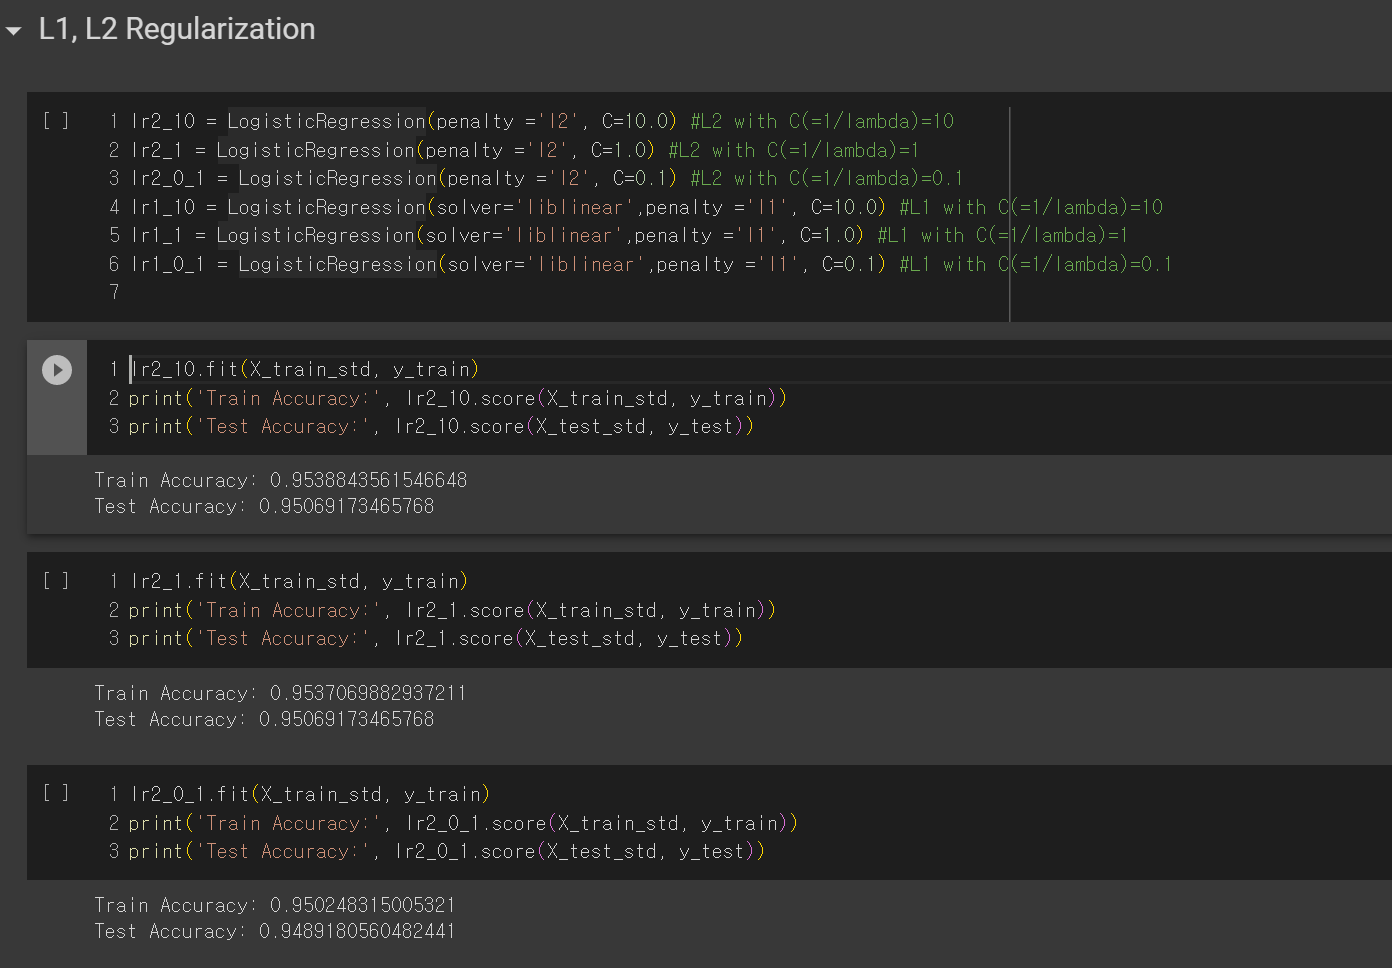
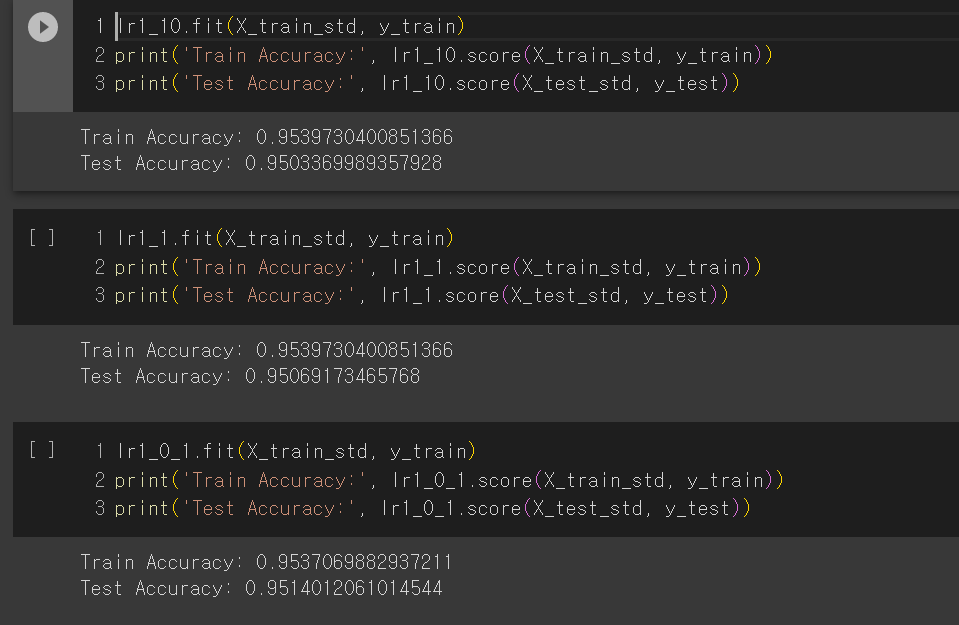

In [ ]:
lr2_10 = LogisticRegression(penalty ='l2', C=10.0) #L2 with C(=1/lambda)=10
lr2_1 = LogisticRegression(penalty ='l2', C=1.0) #L2 with C(=1/lambda)=1
lr2_0_1 = LogisticRegression(penalty ='l2', C=0.1) #L2 with C(=1/lambda)=0.1
lr1_10 = LogisticRegression(solver='liblinear',penalty ='l1', C=10.0) #L1 with C(=1/lambda)=10
lr1_1 = LogisticRegression(solver='liblinear',penalty ='l1', C=1.0) #L1 with C(=1/lambda)=1
lr1_0_1 = LogisticRegression(solver='liblinear',penalty ='l1', C=0.1) #L1 with C(=1/lambda)=0.1


In [ ]:
lr2_10.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_10.score(X_train_std, y_train))
print('Test Accuracy:', lr2_10.score(X_test_std, y_test))

Train Accuracy: 0.8972139044395261
Test Accuracy: 0.9065347565738089


In [ ]:
lr2_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_1.score(X_train_std, y_train))
print('Test Accuracy:', lr2_1.score(X_test_std, y_test))

Train Accuracy: 0.8959770863168858
Test Accuracy: 0.9086175475136683


In [ ]:
lr2_0_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_0_1.score(X_train_std, y_train))
print('Test Accuracy:', lr2_0_1.score(X_test_std, y_test))

Train Accuracy: 0.8859523499544331
Test Accuracy: 0.9005467326217131


In [ ]:
print(lr2_10.intercept_)
print(lr2_1.intercept_)
print(lr2_0_1.intercept_)

[3.42032658]
[2.39728239]
[0.57180208]


In [ ]:
print(lr2_10.coef_)
print(lr2_1.coef_)
print(lr2_0_1.coef_)

[[-3.70611984e+00 -3.06283604e+00 -4.27331664e+00 -1.88082235e+00
   2.01465725e-01 -6.79644966e-01  2.85976947e-02 -1.43320470e-01
  -2.13448427e-01  1.94150124e+01 -5.97955776e-02 -9.38261524e-03
   1.12889718e-02 -3.73595456e-01  3.33132309e-02 -3.42468284e-01
   7.94479402e-02  8.98470198e-02  2.02612582e-01 -3.78061705e-02
   7.37108079e-02 -1.97291472e-02  3.93888404e-02  4.52651973e-02
  -5.35394016e-02 -4.21496514e-01 -3.00641148e-01  1.57118229e-01
   1.35866639e-02  2.25999667e-02  3.00285789e-05 -7.71749464e-01
  -2.28267784e-01 -1.22857757e-01 -2.99770443e-01 -1.21589757e-01
   1.20919856e-01  6.21284708e-02]]
[[-2.80020844e+00 -2.30587983e+00 -3.23262169e+00 -1.45436828e+00
   2.00366834e-01 -6.67350882e-01  2.82557437e-02 -1.50345797e-01
  -2.00260157e-01  1.56636538e+01 -4.73526762e-02 -1.89033877e-03
   1.20399331e-02 -3.44839548e-01  3.16617284e-02 -3.36710409e-01
   7.06748212e-02  8.97899011e-02  1.96167669e-01 -3.67208095e-02
   7.24603718e-02 -2.26741334e-02  3.945

In [ ]:
lr1_10.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_10.score(X_train_std, y_train))
print('Test Accuracy:', lr1_10.score(X_test_std, y_test))

In [ ]:
lr1_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_1.score(X_train_std, y_train))
print('Test Accuracy:', lr1_1.score(X_test_std, y_test))

In [ ]:
lr1_0_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_0_1.score(X_train_std, y_train))
print('Test Accuracy:', lr1_0_1.score(X_test_std, y_test))

In [ ]:
# print(lr1_10.intercept_)
print(lr1_1.intercept_)
print(lr1_0_1.intercept_)

In [ ]:
# print(lr1_10.coef_)
print(lr1_1.coef_)
print(lr1_0_1.coef_)

## LDA
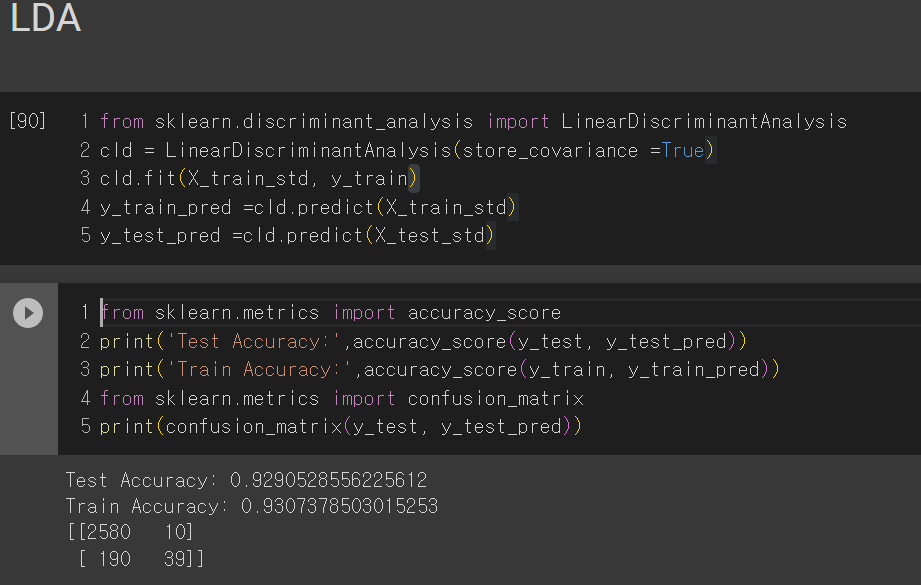


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# LDA 분류기 생성
lda = LinearDiscriminantAnalysis()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_components': [1],  # LDA 변환 차원
    'solver': ['svd', 'lsqr', 'eigen']  # 최적화 알고리즘
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(lda, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_test_pred = grid_search.predict(X_test_std)
y_train_pred = grid_search.predict(X_train_std)


Best Parameters: {'n_components': 1, 'solver': 'svd'}


In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8164540484248893
Train Accuracy: 0.7954042442390313
[[2626    6]
 [ 699  510]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


## QDA
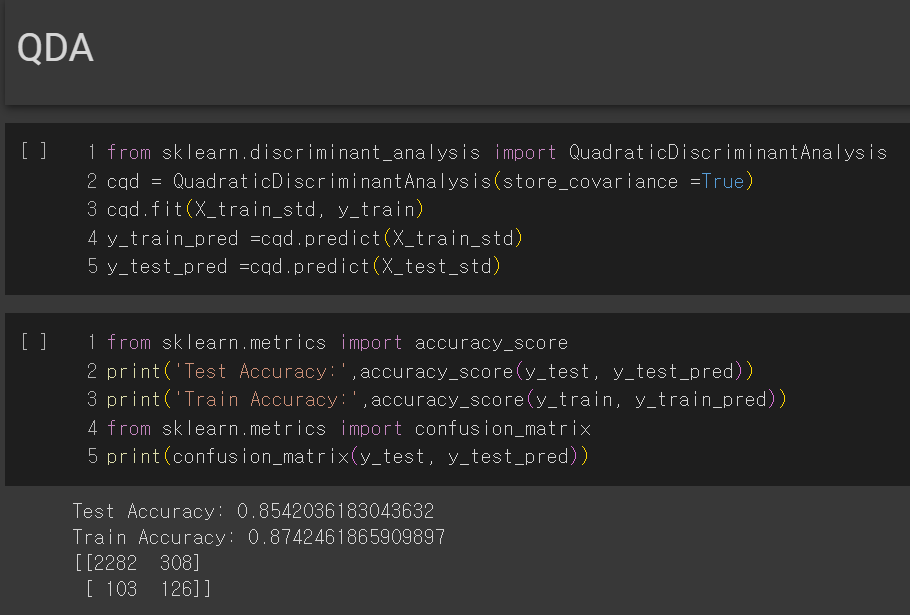


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# QDA 분류기 생성
qda = QuadraticDiscriminantAnalysis()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'reg_param': [0.0, 0.1, 0.2],  # 정규화 매개변수
    'priors': [None, [0.5, 0.5], [0.3, 0.7]]  # 사전 확률
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(qda, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측

y_train_pred =grid_search.predict(X_train_std)
y_test_pred =grid_search.predict(X_test_std)

Best Parameters: {'priors': [0.3, 0.7], 'reg_param': 0.0}


In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8862275449101796
Train Accuracy: 0.8731935945840386
[[2613   19]
 [ 418  791]]


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     10260
           1       0.98      0.63      0.77      5102

    accuracy                           0.87     15362
   macro avg       0.91      0.81      0.84     15362
weighted avg       0.89      0.87      0.86     15362

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2632
           1       0.98      0.65      0.78      1209

    accuracy                           0.89      3841
   macro avg       0.92      0.82      0.85      3841
weighted avg       0.90      0.89      0.88      3841



# Naive Bayes
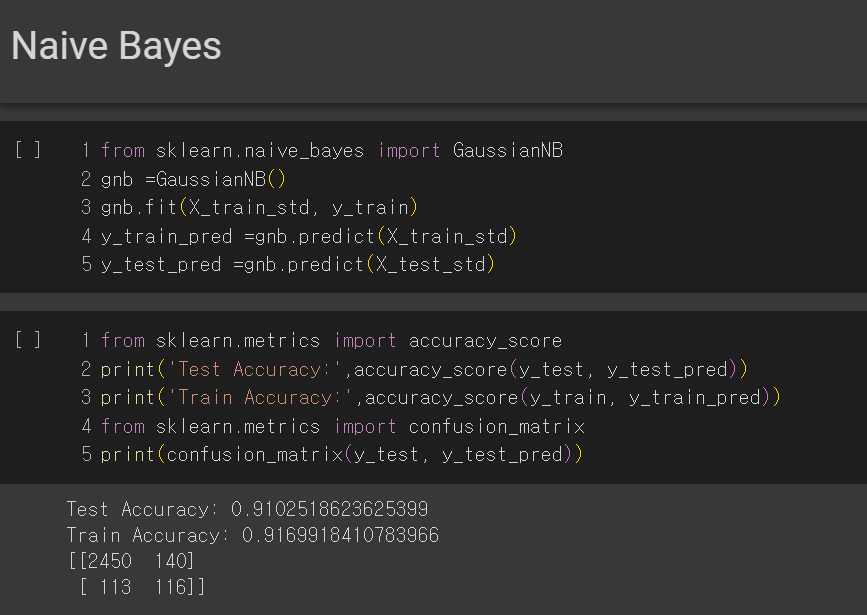

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb =GaussianNB()
# gnb.fit(X_train_std, y_train)
# y_train_pred =gnb.predict(X_train_std)
# y_test_pred =gnb.predict(X_test_std)

In [ ]:
# from sklearn.metrics import accuracy_score
# print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
# print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_test_pred))

# Classification Tree
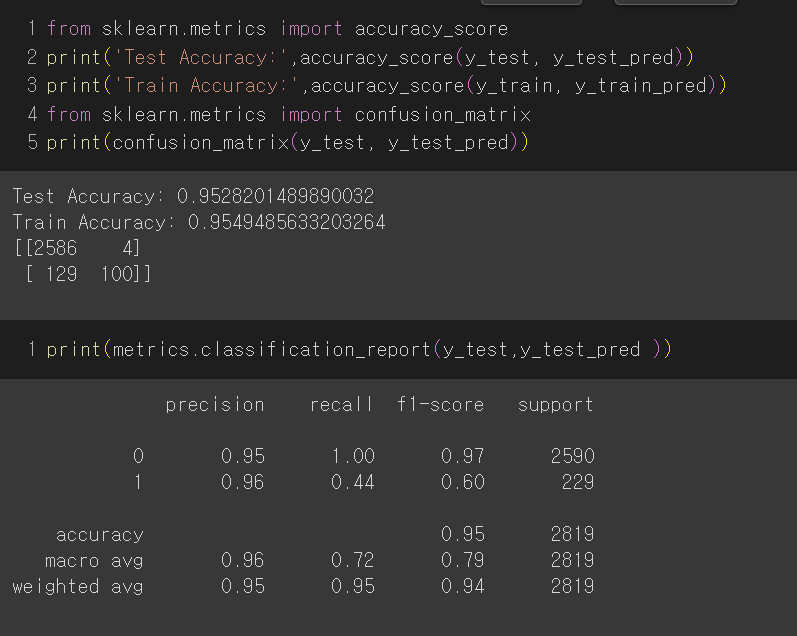


In [ ]:
# from sklearn import tree
# dtc =tree.DecisionTreeClassifier(criterion ='gini', max_depth=3,random_state=1 )
# result =dtc.fit(X_train_std, y_train)

# y_train_pred =dtc.predict(X_train_std)
# y_test_pred =dtc.predict(X_test_std)

In [ ]:
# tree.plot_tree(result, class_names=['0','1'], feature_names=X_train.columns)

In [ ]:
# from sklearn.metrics import accuracy_score
# print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
# print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# from sklearn import metrics
# print(metrics.classification_report(y_test,y_test_pred ))

In [ ]:
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz
# dot_data =export_graphviz(dtc, filled=True, rounded =True,
#                           class_names =['0','1'],
#                           feature_names=X_train.columns,
#                           out_file=None)

# graph =graph_from_dot_data(dot_data)
# graph.write_png('tree_depth3.png')

# from IPython.display import Image
# Image(graph.create_png())

# SVM
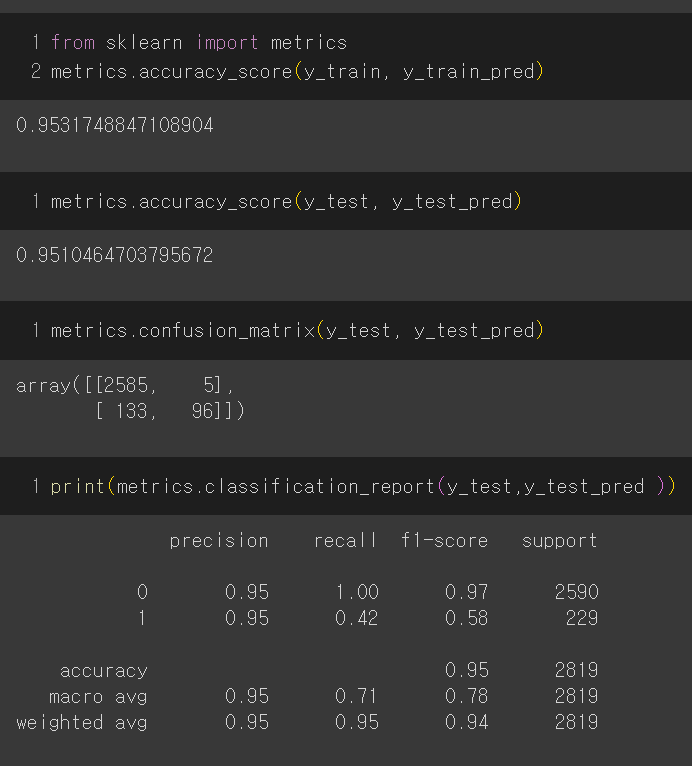

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM 분류기 생성
svm = SVC()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1, 10],  # 규제 매개변수
    'kernel': ['linear', 'rbf'],  # 커널 함수
    'gamma': ['scale', 'auto']  # 가우시안 커널의 gamma 값
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(svm, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측

y_train_pred =grid_search.predict(X_train_std)
y_test_pred =grid_search.predict(X_test_std)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

0.9257258169509178

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

0.9185108044780005

In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[2595,   37],
       [ 276,  933]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10260
           1       0.98      0.80      0.88      5102

    accuracy                           0.93     15362
   macro avg       0.94      0.89      0.91     15362
weighted avg       0.93      0.93      0.92     15362

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2632
           1       0.96      0.77      0.86      1209

    accuracy                           0.92      3841
   macro avg       0.93      0.88      0.90      3841
weighted avg       0.92      0.92      0.92      3841



# Kernel SVM
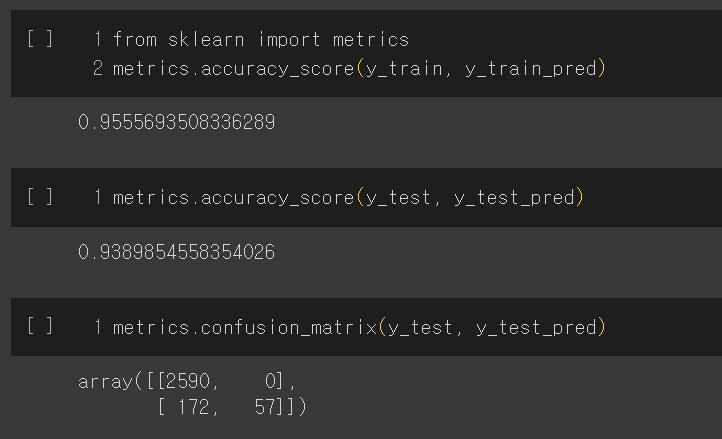

In [ ]:
ksvm =SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=42)
ksvm.fit(X_train_std, y_train)

y_train_pred =ksvm.predict(X_train_std)
y_test_pred =ksvm.predict(X_test_std)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

In [ ]:
print(ksvm.support_)
print(ksvm.n_support_)

In [ ]:
print(metrics.classification_report(y_test,y_test_pred ))

# 차원축소

In [ ]:
#고유값, 고유벡터 구하기
scov=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov) 
print('Eigenvalues Wn%s' %eigen_vals)

Eigenvalues Wn[5.45562547 3.47568073 2.20792347 1.59068685 1.49552771 0.07744401
 0.08176229 0.0970594  0.17533704 0.21908919 0.25199456 0.28480623
 0.4132895  1.29391781 0.4588653  0.50293429 0.53660547 0.57789722
 1.2324909  0.65908046 0.67265087 1.17538667 1.15149852 0.72060887
 0.78651671 0.78230882 0.82124199 0.85463501 1.09850755 0.88302475
 0.9141286  1.06339616 1.02059399 1.03139854 1.02790952 0.9553834
 0.9861381  0.96912786]


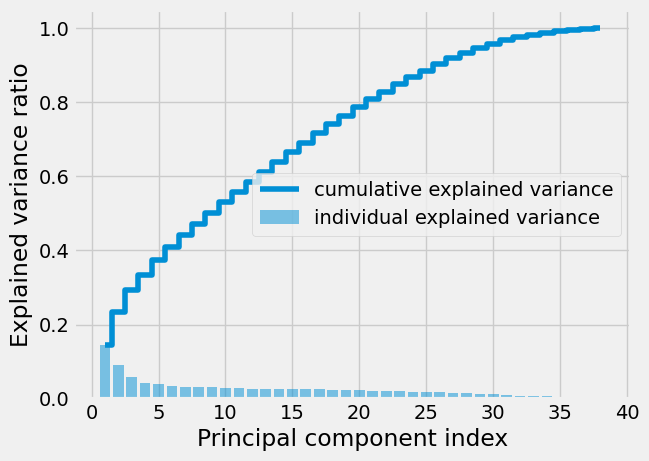

In [ ]:
# Exolained var lance ratio
tot = sum(eigen_vals)
var_exp = [(i/ tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt 
plt.bar(range(1, 39), var_exp, alpha= 0.5, align= 'center' , label= 'individual explained variance')
plt.step(range (1,39), cum_var_exp, where= 'mid', label = 'cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt. show()


In [ ]:
# PCA를 통해 차원 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
Ir=LogisticRegression()
Ipca = PCA(n_components =7)
X_train_pca = Ipca.fit_transform(X_train_std)
X_test_pca = Ipca.transform(X_test_std)
Ir.fit(X_train_pca, y_train) 
y_train_pre=Ir.predict(X_train_pca) 
y_test_pre=Ir.predict(X_test_pca)
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre)) 
print(metrics.accuracy_score(y_test, y_test_pre))

0.7495768780106757
0.7708929966154647


In [ ]:
print(Ipca.components_)
print(Ipca.explained_variance_ratio_)

[[-0.13370121 -0.10342504  0.22677303 -0.0496321   0.01067678 -0.03338679
  -0.0017492  -0.00685281  0.01534712  0.06589889 -0.00314851  0.01793276
  -0.00137596 -0.02608797  0.02835283  0.19889227  0.18457668  0.1376382
   0.3284502   0.0956211   0.23061468  0.02852955 -0.02388618  0.32029578
  -0.08385304  0.0965507   0.3007581   0.06845117  0.02543984  0.23412903
   0.21596298  0.03604267  0.33236752  0.01145921  0.31352392  0.21245098
   0.2127878  -0.17001304]
 [ 0.3085855   0.0723186  -0.38741092  0.1062552  -0.01582994  0.01797595
   0.00072486  0.01563362  0.00465364  0.00292248  0.00168423  0.00469143
   0.01385715  0.04755754  0.04162443  0.13501447  0.08515736  0.15412828
   0.07420536  0.00631514  0.16622846 -0.02219068  0.19893145  0.16181912
   0.24109463  0.11975226  0.14972424 -0.07611837  0.14203483  0.00689968
  -0.37572128  0.00444998  0.14857163  0.1781189   0.17169799  0.12886074
  -0.23130971  0.4110546 ]
 [ 0.34460436 -0.53052059  0.09599389 -0.01028855 -0.006825

# RandomForest : grid search


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 분류기 생성
rf = RandomForestClassifier()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 결정 트리 개수
    'max_depth': [None, 5, 10],  # 결정 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 내부 노드를 분할하기 위해 필요한 최소 샘플 개수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_pred = grid_search.predict(X_test_std)
print(y_pred)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
[0 0 1 ... 0 0 1]


In [ ]:

y_train_pred =grid_search.predict(X_train_std)
y_test_pred =grid_search.predict(X_test_std)

In [ ]:
print(metrics.classification_report(y_train,y_train_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10260
           1       1.00      1.00      1.00      5102

    accuracy                           1.00     15362
   macro avg       1.00      1.00      1.00     15362
weighted avg       1.00      1.00      1.00     15362



In [ ]:
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2632
           1       0.97      0.88      0.92      1209

    accuracy                           0.95      3841
   macro avg       0.96      0.93      0.94      3841
weighted avg       0.95      0.95      0.95      3841



In [ ]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9518354595157511
